<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-equipo157/blob/main/Reto_Final_Equipo_157.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Ciencia y analítica de datos</h1>
<h2>Reto Final</h2>
<h3>Noviembre 16, 2022</h3>
<p>
Equipo 157 </br>
Juan Pablo Noguerón Morales - A01097897 </br>
Mauricio Xavier Muñoz Escobar - A01793598
</p>
<p>
Github link: https://github.com/PosgradoMNA/actividades-de-aprendizaje-equipo157/blob/main/Reto_Final_Equipo_157.ipynb
</p>

In [164]:
#Librerías para manejo del archivo
import requests, zipfile as zf
from io import BytesIO

#Librerias para manipulación de datos
import pandas as pd
import numpy as np

#Librerías para graficado
import matplotlib.pyplot as plt 
import seaborn as sns

In [165]:
#Descargamos y extracción de datos
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile = zf.ZipFile(BytesIO(req.content))
zipfile.extractall('/content')

In [166]:
#Lectura del archivo
df = pd.read_csv("/content/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", 
                 sep=",", 
                 encoding = "ISO-8859-1"
  )

df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


# Análisis de datos

In [761]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CR_CAT,CALIDAD_HG_CAT,CUMPLE_CON_HG_CAT,CALIDAD_PB_CAT,CUMPLE_CON_PB_CAT,CALIDAD_MN_CAT,CUMPLE_CON_MN_CAT,CALIDAD_FE_CAT,CUMPLE_CON_FE_CAT,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,1,1,1,1,1,0,1,0,1,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,1,1,1,1,1,0,1,0,1,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,1,1,1,1,1,0,1,0,1,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,1,1,1,1,1,0,1,0,1,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,1,1,1,1,1,0,1,0,1,POINT (-110.24480 23.45138)


Primero que nada, vamos a realizar un análisis de los registros y columnas que tenemos

In [762]:
df.shape

(1068, 88)

Se observa que el archivo contiene 1068 registros y 57 columnas. Se procede a hacer análisis del contenido

In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLAVE                     1068 non-null   object  
 1   SITIO                     1068 non-null   object  
 2   ORGANISMO_DE_CUENCA       1068 non-null   object  
 3   ESTADO                    1068 non-null   object  
 4   MUNICIPIO                 1068 non-null   object  
 5   ACUIFERO                  1068 non-null   object  
 6   SUBTIPO                   1068 non-null   object  
 7   LONGITUD                  1068 non-null   float64 
 8   LATITUD                   1068 non-null   float64 
 9   PERIODO                   1068 non-null   int64   
 10  ALC_mg/L                  1068 non-null   float64 
 11  CALIDAD_ALC               1068 non-null   object  
 12  CONDUCT_mS/cm             1068 non-null   float64 
 13  CALIDAD_CONDUC            1068 non-null   object

El análisis inicial nos indica dos cosas



1.   Hay valores nulos contenidos en algunas columnas, por lo que la imputación será necesaria
2.   La mayoría de las columnas no tienen un tipo de dato definido. Habrá que corregir esto mediante casteo en aras de beneficiar las regresiones. 



In [764]:
print('Análisis de datos nulos')
df.isna().any()

Análisis de datos nulos


CLAVE                  False
SITIO                  False
ORGANISMO_DE_CUENCA    False
ESTADO                 False
MUNICIPIO              False
                       ...  
CALIDAD_MN_CAT         False
CUMPLE_CON_MN_CAT      False
CALIDAD_FE_CAT         False
CUMPLE_CON_FE_CAT      False
Coordinates            False
Length: 88, dtype: bool

Se observa que no todos los datos son nulos. Sin embargo, una buena práctica es definir estrategia de imputación incluso para aquellos datos que actualmente no son nulos. Esto se hace en caso de que en el futuro recibamos datos nulos para la misma columna. 

In [765]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,...,CALIDAD_CR_CAT,CUMPLE_CON_CR_CAT,CALIDAD_HG_CAT,CUMPLE_CON_HG_CAT,CALIDAD_PB_CAT,CUMPLE_CON_PB_CAT,CALIDAD_MN_CAT,CUMPLE_CON_MN_CAT,CALIDAD_FE_CAT,CUMPLE_CON_FE_CAT
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,0.0,1068.000000,1068.000000,1068.000000,1068.000000,...,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.558455,1137.133052,NaN,895.454185,1.075600,347.842003,355.490356,...,0.985955,0.985955,0.999064,0.999064,0.988764,0.988764,0.114232,0.919476,0.127341,0.872659
std,6.703263,3.887670,0.0,116.661485,1242.292889,NaN,2748.991295,1.924278,359.514579,2052.457014,...,0.117731,0.117731,0.030600,0.030600,0.105452,0.105452,0.410800,0.272231,0.333511,0.333511
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN,25.000000,0.200000,20.000000,1.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,NaN,337.700000,0.267175,121.274100,1.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN,550.400000,0.503500,245.335800,1.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,NaN,915.900000,1.139850,453.930000,13.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN,82170.000000,34.803300,3810.692200,24196.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


El describe inicial nos devuelve únicamente aquellas columnas identificadas como numéricas. Se espera que después del casteo de datos podamos realizar un análisis más profundo con describe. 

##Análisis por columna

Empezaremos a hacer un análisis detallado de cada columna (o par de columnas). Acá decidiremos la estrategia individual de imputación, así como el casteo necesario

In [766]:
#Declaramos un arreglo que contendrá las columnas que iremos dropeando
columnas_drop = []

### Clave

In [767]:
df[['CLAVE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CLAVE   1068 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [768]:
df[['CLAVE']].describe()

,CLAVE
count,1068
unique,1068
top,DLAGU6
freq,1


Se observa que la clave no es más que un identificador único para cada registro. Dado a que es un identificador, no se considerará para ningún tipo de regresión y por lo tanto no será tratado con imputación. Más aún, la columna como tal se dropeara del dataframe para no generar ruido innecesario a ningún modelo. 

In [769]:
columnas_drop.append('CLAVE')

columnas_drop

['CLAVE']

### Sitio

In [770]:
df[['SITIO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SITIO   1068 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [771]:
df[['SITIO']].describe()

,SITIO
count,1068
unique,1066
top,EL FUERTE
freq,2


Sitio no es más que un indicativo del lugar de ubicación. Para este análisis particular se usará latitud y longitud, por lo que la "descripción" del lugar de ubicación es irrelevante para nuestro análisis. Esta columna también será dropeada del dataframe final para no generar ruido

In [772]:
columnas_drop.append('SITIO')
columnas_drop

['CLAVE', 'SITIO']

### Organismo de la cuenca, Estado, Municipio, Acuífero

Las columnas de Organismo de la cuenca, Estado, Muncipio y Acuífero nos indican un poco más sobre la clasificación geográfica de cada uno de los sitios de monitoreo. Como tal, tampoco son útiles para nuestro análisis ya que nosotros usaremos directamente las coordenadas geográficas y, por lo tanto, estas columnas no serán imputadas ni tratadas, y serán dropeadas del dataset para el análisis final dado que su presencia podría meter ruido. Sin embargo, si podemos realizar un análisis sobre como la información está distribuida.

####Organismo de la cuenca

In [773]:
df[['ORGANISMO_DE_CUENCA']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ORGANISMO_DE_CUENCA  1068 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [774]:
df[['ORGANISMO_DE_CUENCA']].describe()

,ORGANISMO_DE_CUENCA
count,1068
unique,13
top,CUENCAS CENTRALES DEL NORTE
freq,232


<function matplotlib.pyplot.show(*args, **kw)>

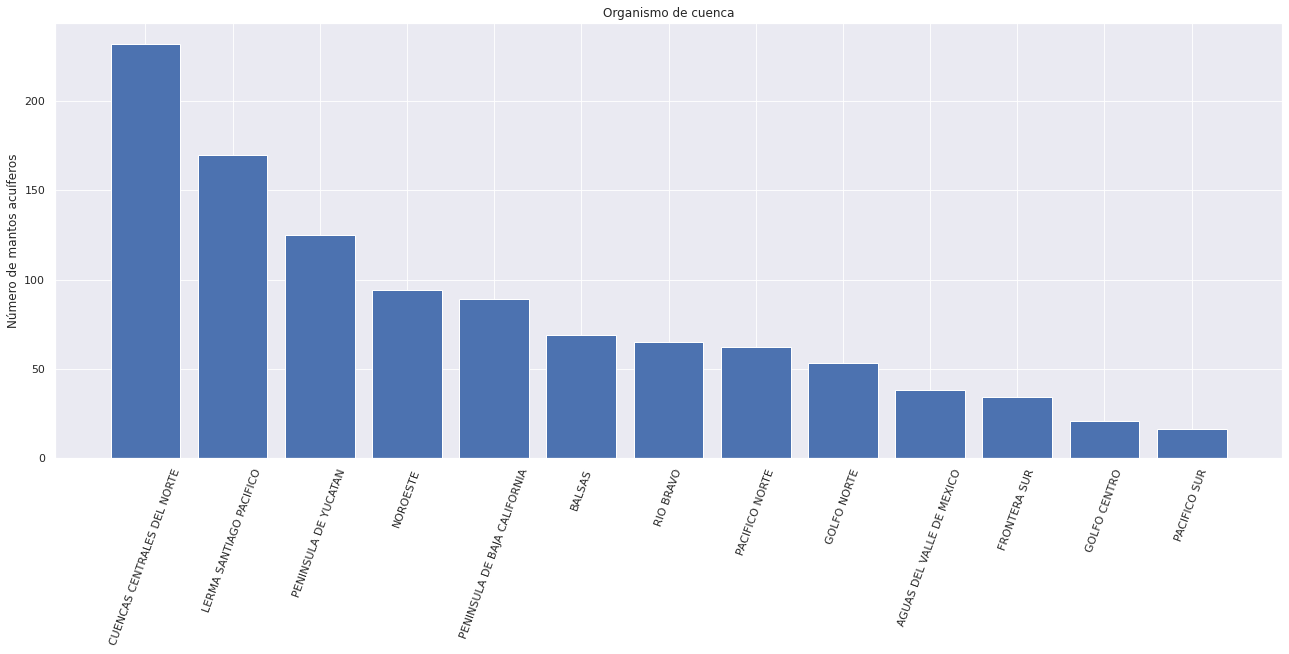

In [775]:
sns.set(rc={'figure.figsize':(22,8)})
plt.bar(
    range(len(df[['ORGANISMO_DE_CUENCA']].value_counts())), 
    df[['ORGANISMO_DE_CUENCA']].value_counts().values
)
plt.xticks(
    range(len(df[['ORGANISMO_DE_CUENCA']].value_counts())), 
    df[['ORGANISMO_DE_CUENCA']].value_counts().index.get_level_values(0).values, 
    #size='small',
    rotation = 70
)
plt.title('Organismo de cuenca')
plt.ylabel('Número de mantos acuíferos')

plt.show

Se puede observar que el organismo con más mantos acuíferos es Cuencas centrales del norte, mientras que Pacífico Sures el que menos tiene bajo su supervisión

In [776]:
columnas_drop.append('ORGANISMO_DE_CUENCA')
columnas_drop

['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA']

####Estado

In [777]:
df[['ESTADO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ESTADO  1068 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [778]:
df[['ESTADO']].describe()

,ESTADO
count,1068
unique,32
top,DURANGO
freq,121


<function matplotlib.pyplot.show(*args, **kw)>

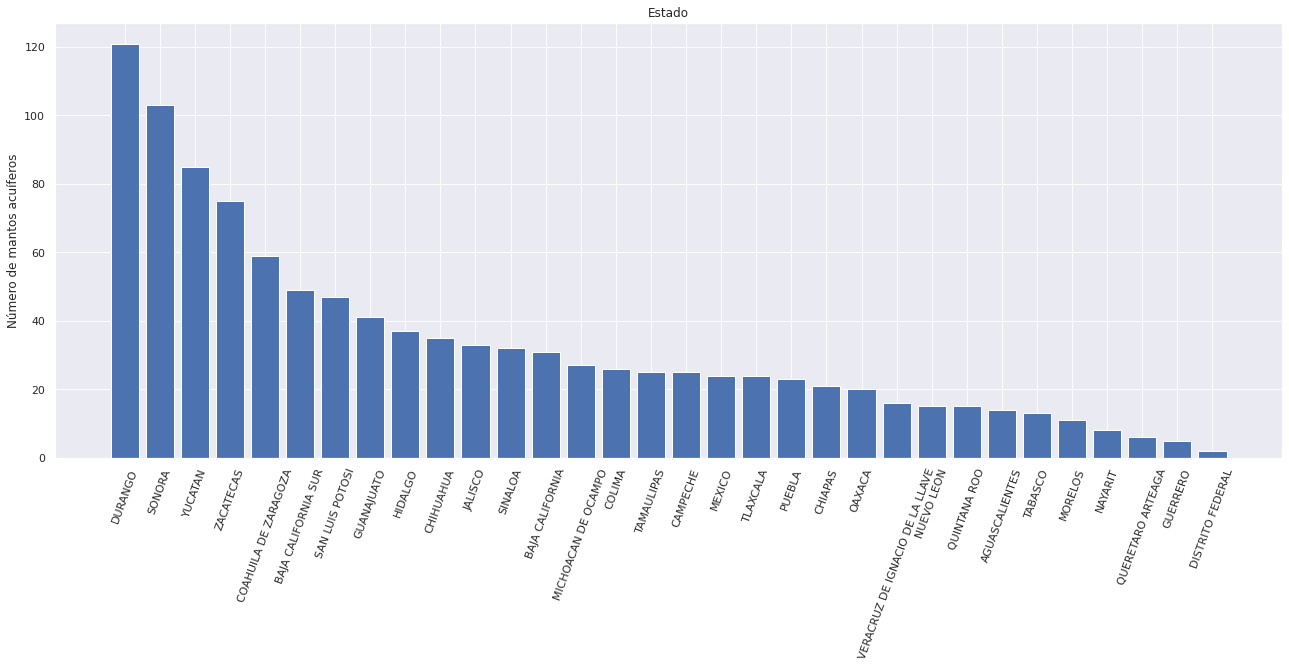

In [779]:
sns.set(rc={'figure.figsize':(22,8)})
plt.bar(
    range(len(df[['ESTADO']].value_counts())), 
    df[['ESTADO']].value_counts().values
)
plt.xticks(
    range(len(df[['ESTADO']].value_counts())), 
    df[['ESTADO']].value_counts().index.get_level_values(0).values, 
    #size='small',
    rotation = 70
)
plt.title('Estado')
plt.ylabel('Número de mantos acuíferos')

plt.show

In [780]:
columnas_drop.append('ESTADO')
columnas_drop

['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO']

####Municipio


In [781]:
df[['MUNICIPIO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MUNICIPIO  1068 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [782]:
df[['MUNICIPIO']].describe()

,MUNICIPIO
count,1068
unique,452
top,LA PAZ
freq,27


<function matplotlib.pyplot.show(*args, **kw)>

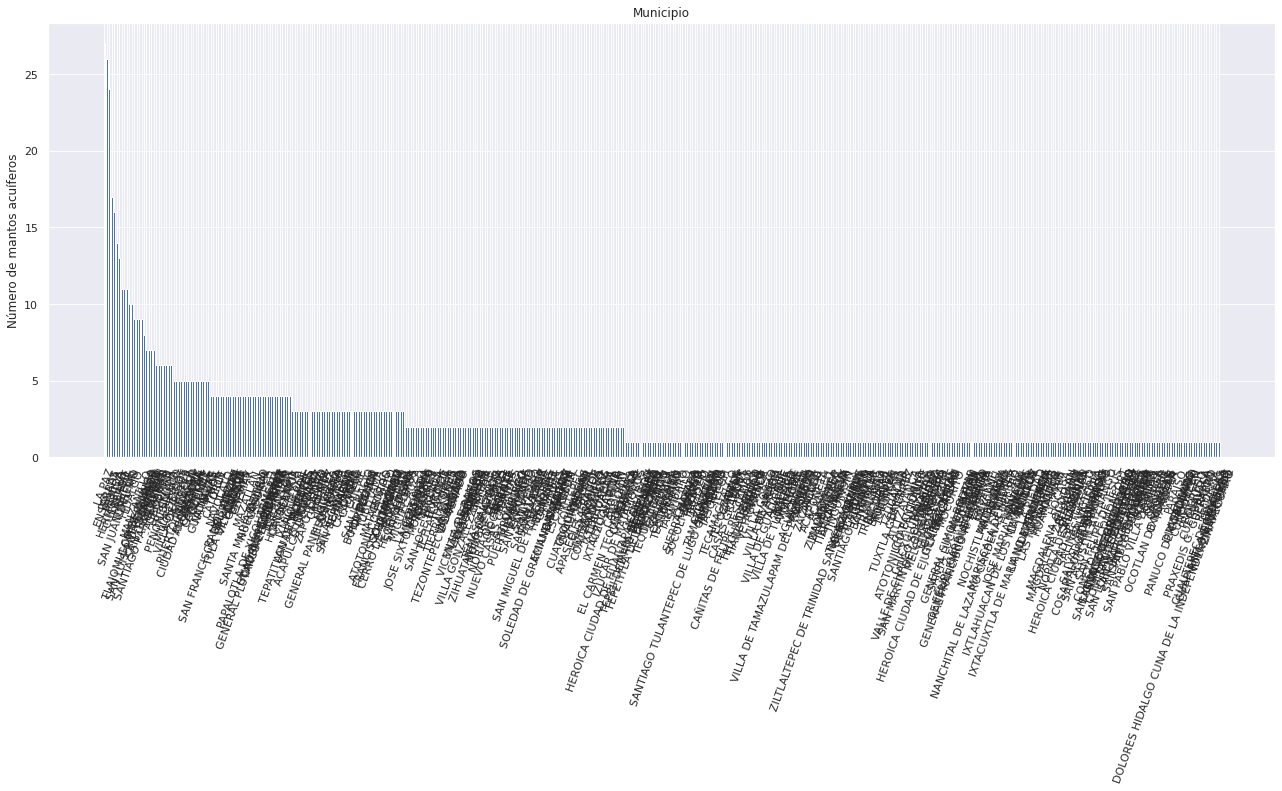

In [783]:
sns.set(rc={'figure.figsize':(22,8)})
plt.bar(
    range(len(df[['MUNICIPIO']].value_counts())), 
    df[['MUNICIPIO']].value_counts().values
)
plt.xticks(
    range(len(df[['MUNICIPIO']].value_counts())), 
    df[['MUNICIPIO']].value_counts().index.get_level_values(0).values, 
    #size='small',
    rotation = 70
)
plt.title('Municipio')
plt.ylabel('Número de mantos acuíferos')

plt.show

Dado a que son demasiados datos únicos, vemos mejor la lista con conteo

In [784]:
df[['MUNICIPIO']].value_counts().to_frame()

,0
MUNICIPIO,
LA PAZ,27
ENSENADA,26
PARRAS,24
HERMOSILLO,17
MERIDA,16
...,...
REFORMA,1
RINCON DE ROMOS,1
CRUILLAS,1


In [785]:
columnas_drop.append('MUNICIPIO')
columnas_drop

['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO']

####Acuífero

In [786]:
df[['ACUIFERO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ACUIFERO  1068 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [787]:
df[['ACUIFERO']].describe()

,ACUIFERO
count,1068
unique,273
top,PENINSULA DE YUCATAN
freq,119


<function matplotlib.pyplot.show(*args, **kw)>

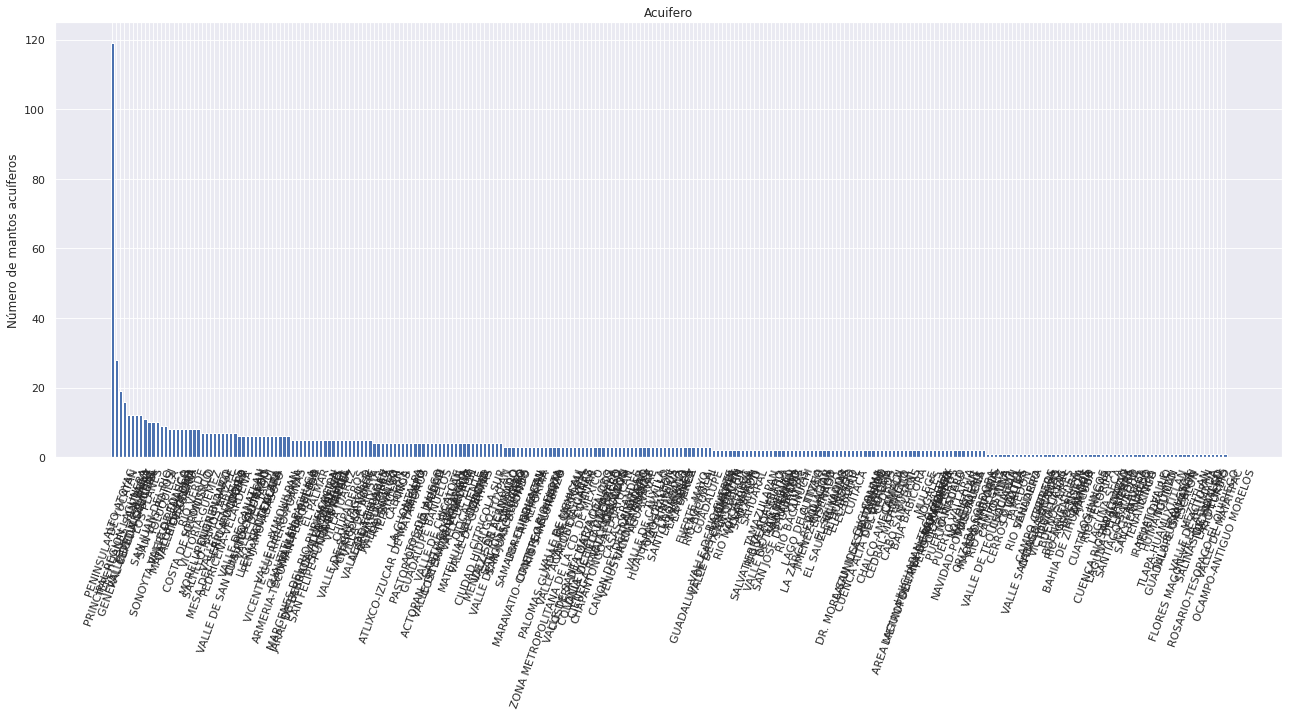

In [788]:
sns.set(rc={'figure.figsize':(22,8)})
plt.bar(
    range(len(df[['ACUIFERO']].value_counts())), 
    df[['ACUIFERO']].value_counts().values
)
plt.xticks(
    range(len(df[['ACUIFERO']].value_counts())), 
    df[['ACUIFERO']].value_counts().index.get_level_values(0).values, 
    #size='small',
    rotation = 70
)
plt.title('Acuifero')
plt.ylabel('Número de mantos acuíferos')

plt.show

Nuevamente tenemos demasiados datos, vemos lista de alguno de ellos

In [789]:
df[['ACUIFERO']].value_counts().to_frame()

,0
ACUIFERO,
PENINSULA DE YUCATAN,119
PRINCIPAL-REGION LAGUNERA,28
ALTO ATOYAC,19
TEPEHUANES-SANTIAGO,16
GENERAL CEPEDA-SAUCEDA,12
...,...
NOCHIXTLAN,1
LAS DELICIAS,1
RIO TURBIO,1


In [790]:
columnas_drop.append('ACUIFERO')
columnas_drop

['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO']

###Periodo

In [791]:
df[['PERIODO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   PERIODO  1068 non-null   int64
dtypes: int64(1)
memory usage: 8.5 KB


In [792]:
df[['PERIODO']].describe()

,PERIODO
count,1068.0
mean,2020.0
std,0.0
min,2020.0
25%,2020.0
50%,2020.0
75%,2020.0
max,2020.0


Se puede observar que el periodo tiene un valor único para todos los registros, nunca nulo. Dado a que o es nulo y que todos los registros tienen el mismo valor, no hace falta graficar (la distribución es única). Si se hará imputación de mediana, sin embargo

In [793]:
values = {"PERIODO": df.PERIODO.median()}
values

{'PERIODO': 2020.0}

###Valores por trieja

Los siguientes valores serán analizados por triejas de columnas, pues el dataset trae 3 columnas diferentes relacionadas para cada estudio del agua. 

La información contenida en cada columna está dividida de la siguiente manera:

Columna1: Resultado del estudio. Tipo de dato numérico

Columna2: Interpretación del resultado del estudio (Columna 1). Dado a que esto es meramente una descripción, se busca eliminar la columna de descripción y quedarnos solamente con la columna1 (resultado del estudio) y Columna 3 (Calificación aprobatoria o no aprobatoria para dicho estudio)

Columna 3: Contiene un valor booleano indicando si el estudio cumple con lo mínimo necesario para considerarse como bueno. Consideramos que para determinar la calidad del agua, la tercer columna de cada trieja es la más importante, pues en última instancia nos ayudará a formar el semáforo del agua. 

####Alcalinidad

In [794]:
columns = ['ALC_mg/L', 'CALIDAD_ALC', 'CUMPLE_CON_ALC']
columns_CAT = ['CALIDAD_ALC_CAT', 'CUMPLE_CON_ALC_CAT']

In [795]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ALC_mg/L        1068 non-null   float64
 1   CALIDAD_ALC     1068 non-null   object 
 2   CUMPLE_CON_ALC  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [796]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [797]:
df.fillna(value = values, inplace = True)

In [798]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ALC_mg/L        1068 non-null   float64
 1   CALIDAD_ALC     1068 non-null   object 
 2   CUMPLE_CON_ALC  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [799]:
df[columns].head()

,ALC_mg/L,CALIDAD_ALC,CUMPLE_CON_ALC
0,229.990,Alta,SI
1,231.990,Alta,SI
2,204.920,Alta,SI
3,327.000,Alta,SI
4,309.885,Alta,SI


In [800]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Alta                    798
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64

In [801]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    1005
NO      59
ND       4
Name: CUMPLE_CON_ALC, dtype: int64

In [802]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean      235.558455
std       116.661485
min        26.640000
25%       164.048750
50%       215.527500
75%       292.423750
max      1650.000000
Name: ALC_mg/L, dtype: float64

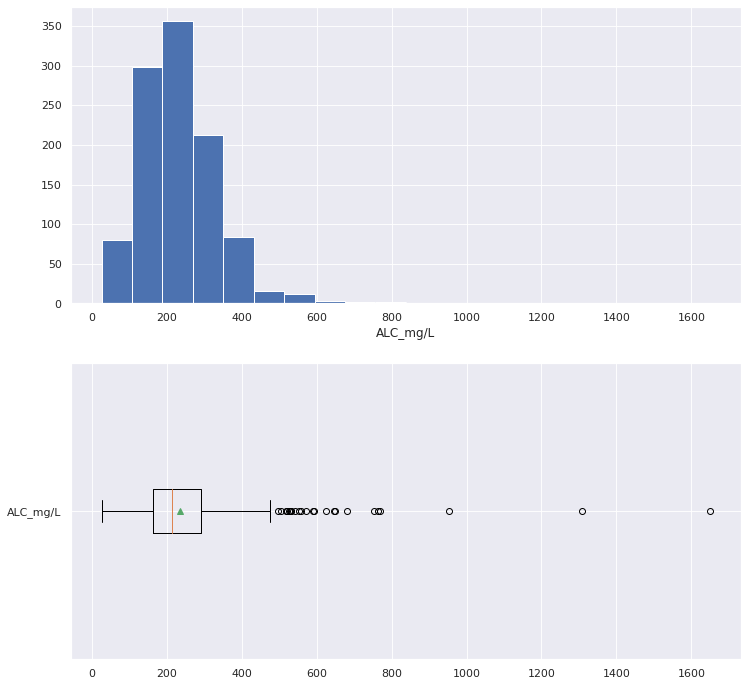

In [803]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

Se observan medias en 200. Pero observamos outliers de hasta 1600

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [804]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

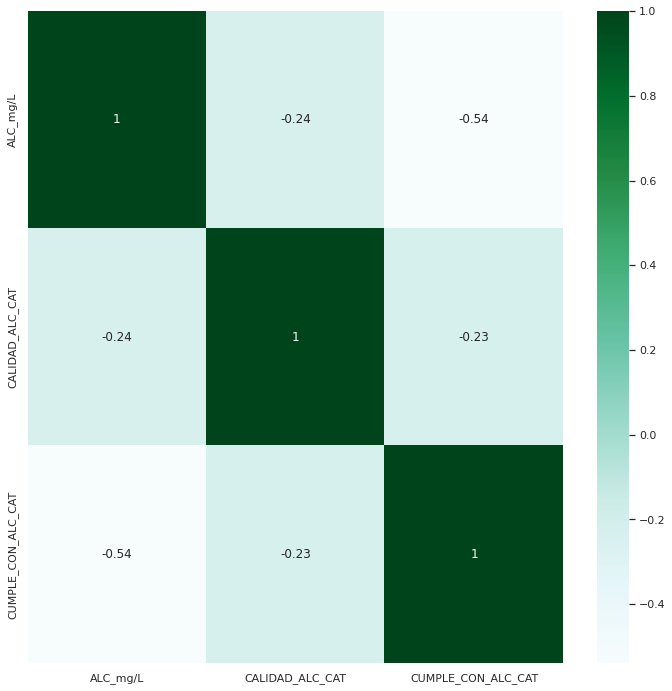

In [805]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Conductividad*

In [806]:
columns = ['CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'CUMPLE_CON_COND']
columns_CAT = ['CALIDAD_CONDUC_CAT', 'CUMPLE_CON_COND_CAT']


In [807]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CONDUCT_mS/cm    1068 non-null   float64
 1   CALIDAD_CONDUC   1068 non-null   object 
 2   CUMPLE_CON_COND  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [808]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [809]:
df.fillna(value = values, inplace = True)

In [810]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CONDUCT_mS/cm    1068 non-null   float64
 1   CALIDAD_CONDUC   1068 non-null   object 
 2   CUMPLE_CON_COND  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [811]:
df[columns].head()

,CONDUCT_mS/cm,CALIDAD_CONDUC,CUMPLE_CON_COND
0,940.0,Permisible para riego,SI
1,608.0,Buena para riego,SI
2,532.0,Buena para riego,SI
3,686.0,Buena para riego,SI
4,1841.0,Permisible para riego,SI


In [812]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Permisible para riego    466
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64

In [813]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    939
NO    123
ND      6
Name: CUMPLE_CON_COND, dtype: int64

In [814]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count     1068.000000
mean      1137.133052
std       1242.292889
min         50.400000
25%        505.500000
50%        815.000000
75%       1321.250000
max      18577.000000
Name: CONDUCT_mS/cm, dtype: float64

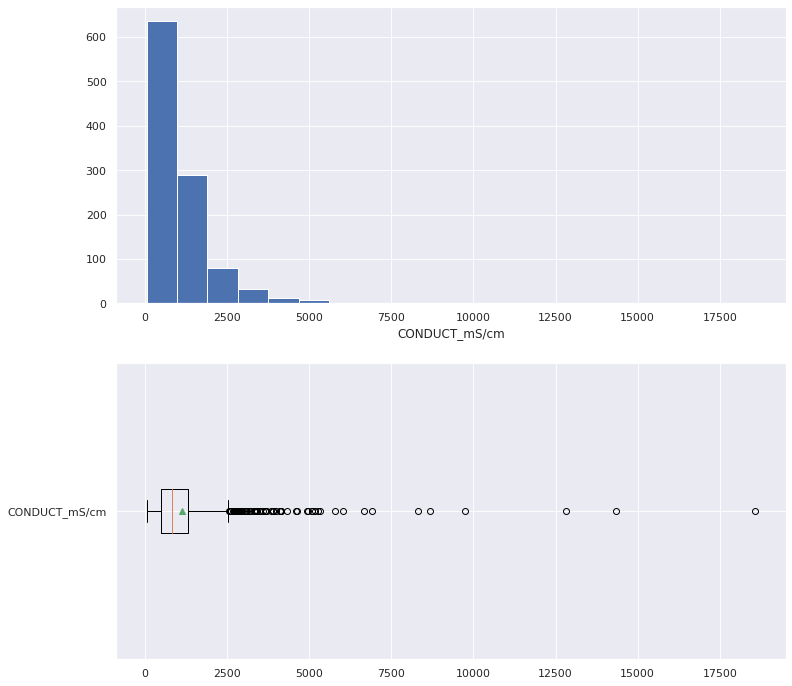

In [815]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media se encuentra en númers por debajo de los 2,000. Sin embargo, tenemos demasiados outliers que llegan hasta el 15,000

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [816]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

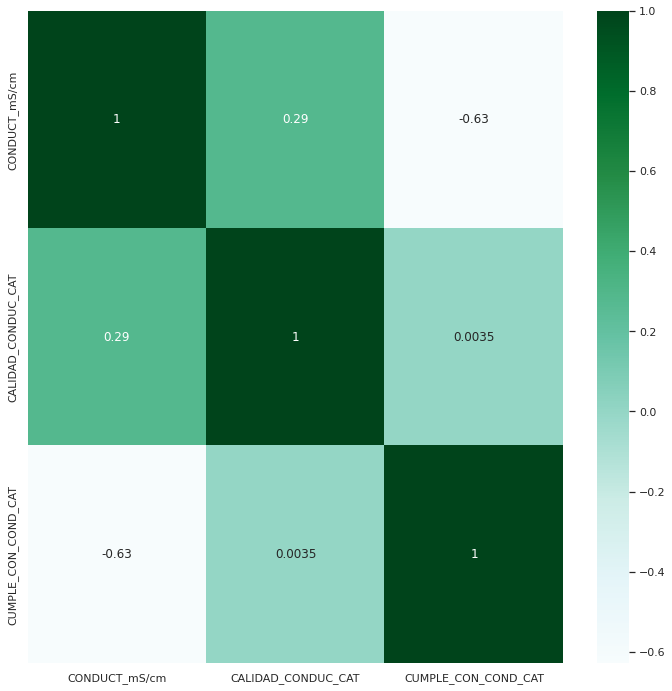

In [817]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Salinización*

In [818]:
		
columns = ['SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin']
columns_CAT = ['CALIDAD_SDT_ra_CAT', 'CALIDAD_SDT_salin_CAT', 'CUMPLE_CON_SDT_ra_CAT', 'CUMPLE_CON_SDT_salin_CAT']


In [819]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SDT_M_mg/L            1068 non-null   float64
 1   CALIDAD_SDT_ra        1068 non-null   object 
 2   CALIDAD_SDT_salin     1068 non-null   object 
 3   CUMPLE_CON_SDT_ra     1068 non-null   object 
 4   CUMPLE_CON_SDT_salin  1068 non-null   object 
dtypes: float64(1), object(4)
memory usage: 41.8+ KB


In [820]:
#tenemos un valor < 25 lo que lo hace no numerico, reemplazamos el < por string vacio
df['SDT_M_mg/L'].replace('<', '', inplace = True, regex=True)

df['SDT_M_mg/L'] = df['SDT_M_mg/L'].astype('float64')

Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [821]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0],
      columns[3] : df[columns[3]].mode()[0], 
      columns[4] : df[columns[4]].mode()[0]
}

In [822]:
df.fillna(value = values, inplace = True)

In [823]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SDT_M_mg/L            1068 non-null   float64
 1   CALIDAD_SDT_ra        1068 non-null   object 
 2   CALIDAD_SDT_salin     1068 non-null   object 
 3   CUMPLE_CON_SDT_ra     1068 non-null   object 
 4   CUMPLE_CON_SDT_salin  1068 non-null   object 
dtypes: float64(1), object(4)
memory usage: 41.8+ KB


In [824]:
df[columns].head()

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin
0,603.6,Cultivos sensibles,Potable - Dulce,SI,SI
1,445.4,Excelente para riego,Potable - Dulce,SI,SI
2,342.0,Excelente para riego,Potable - Dulce,SI,SI
3,478.6,Excelente para riego,Potable - Dulce,SI,SI
4,1179.0,Cultivos con manejo especial,Ligeramente salobres,SI,SI


In [825]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Excelente para riego            493
Cultivos sensibles              343
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64

In [826]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

Potable - Dulce         836
Ligeramente salobres    161
Salobres                 68
Salinas                   3
Name: CALIDAD_SDT_salin, dtype: int64

In [827]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count     1068.000000
mean       895.454185
std       2748.991295
min         25.000000
25%        337.700000
50%        550.400000
75%        915.900000
max      82170.000000
Name: SDT_M_mg/L, dtype: float64

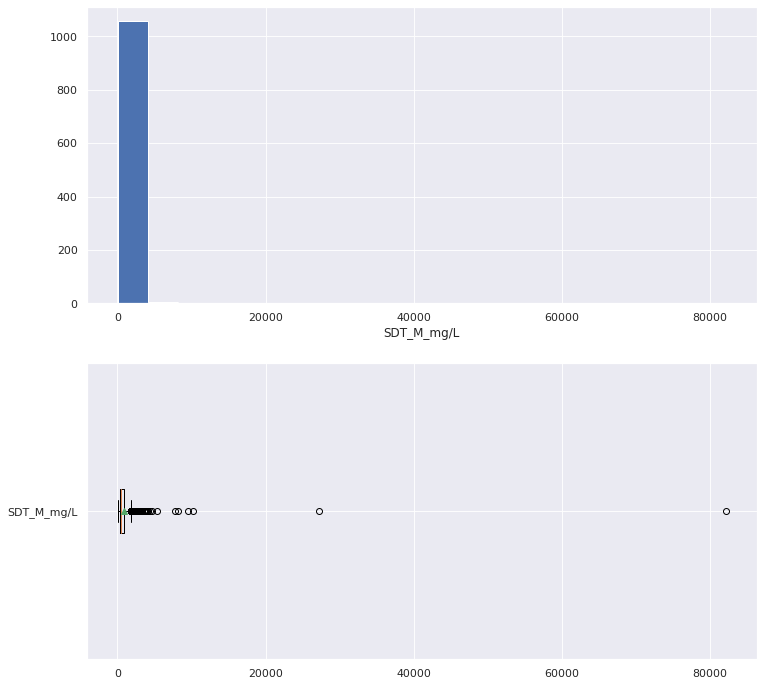

In [828]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media se encuentra entre los valores mas pequeños y hay algunos outliers

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [829]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes
df[columns_CAT[2]] = df[columns[3]].astype('category').cat.codes
df[columns_CAT[3]] = df[columns[4]].astype('category').cat.codes

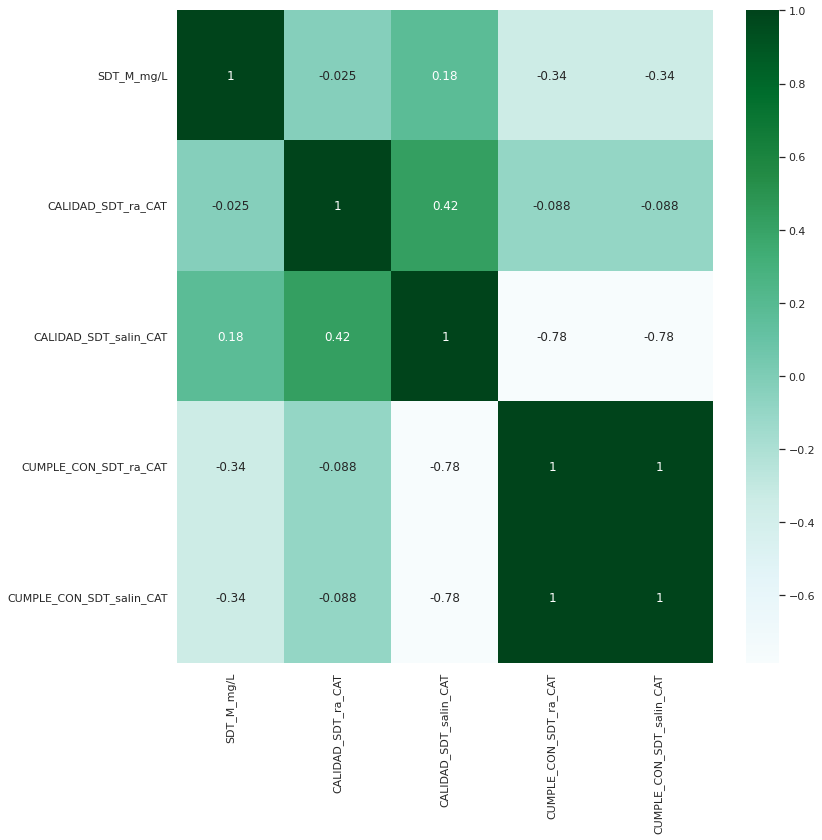

In [830]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1], columns_CAT[2], columns_CAT[3]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Fluoruros*

In [831]:
columns = ['FLUORUROS_mg/L', 'CALIDAD_FLUO', 'CUMPLE_CON_FLUO']
columns_CAT = ['CALIDAD_FLUO_CAT', 'CUMPLE_CON_FLUO_CAT']


In [832]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FLUORUROS_mg/L   1068 non-null   float64
 1   CALIDAD_FLUO     1068 non-null   object 
 2   CUMPLE_CON_FLUO  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [833]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [834]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [835]:
df.fillna(value = values, inplace = True)

In [836]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FLUORUROS_mg/L   1068 non-null   float64
 1   CALIDAD_FLUO     1068 non-null   object 
 2   CUMPLE_CON_FLUO  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [837]:
df[columns].head()

,FLUORUROS_mg/L,CALIDAD_FLUO,CUMPLE_CON_FLUO
0,0.9766,Potable - Optima,SI
1,0.9298,Potable - Optima,SI
2,1.8045,Alta,NO
3,1.1229,Potable - Optima,SI
4,0.2343,Baja,SI


In [838]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Baja                434
Potable - Optima    226
Media               216
Alta                192
Name: CALIDAD_FLUO, dtype: int64

In [839]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    876
NO    192
Name: CUMPLE_CON_FLUO, dtype: int64

In [840]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        1.075600
std         1.924278
min         0.200000
25%         0.267175
50%         0.503500
75%         1.139850
max        34.803300
Name: FLUORUROS_mg/L, dtype: float64

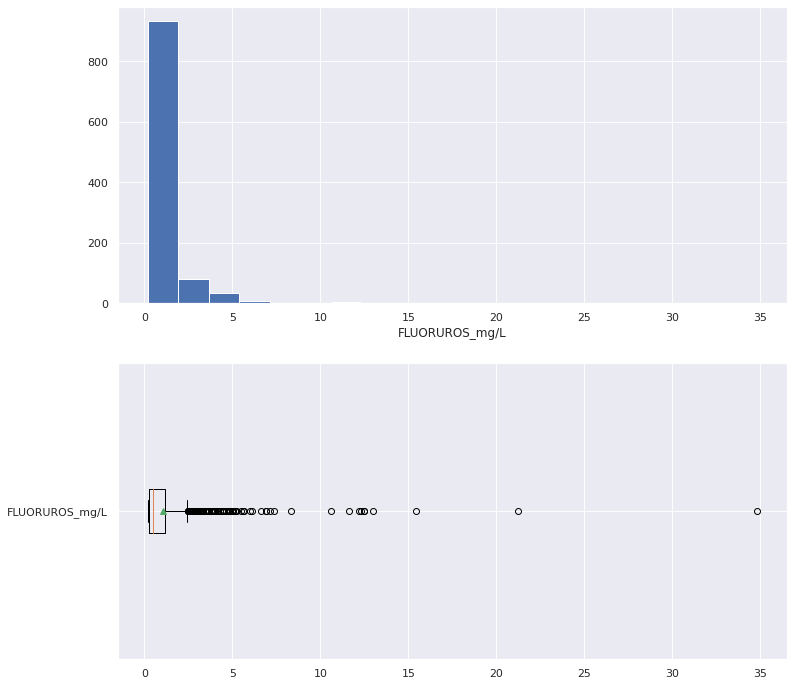

In [841]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media se encuentra en númers por debajo de los 2,000. Sin embargo, tenemos demasiados outliers que llegan hasta el 15,000

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [842]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

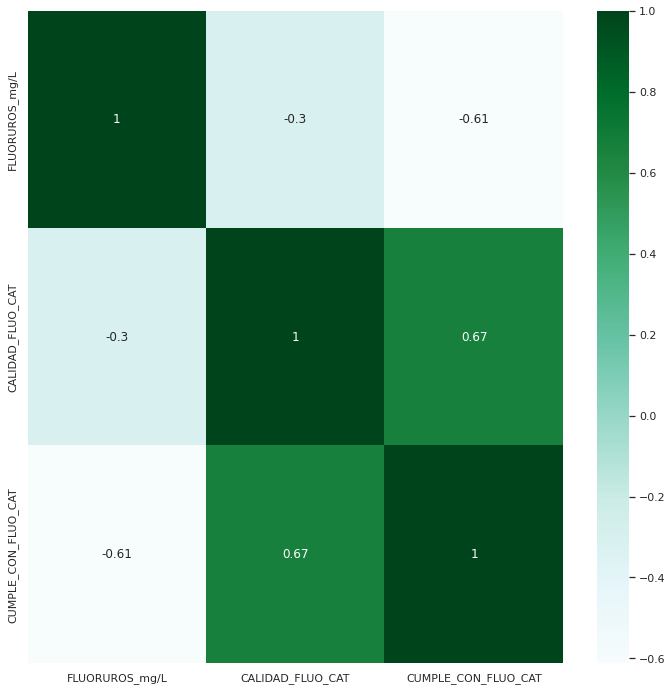

In [843]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Dureza*

In [844]:
	
columns = ['DUR_mg/L', 'CALIDAD_DUR', 'CUMPLE_CON_DUR']
columns_CAT = ['CALIDAD_DUR_CAT', 'CUMPLE_CON_DUR_CAT']


In [845]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DUR_mg/L        1068 non-null   float64
 1   CALIDAD_DUR     1068 non-null   object 
 2   CUMPLE_CON_DUR  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [846]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [847]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [848]:
df.fillna(value = values, inplace = True)

In [849]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DUR_mg/L        1068 non-null   float64
 1   CALIDAD_DUR     1068 non-null   object 
 2   CUMPLE_CON_DUR  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [850]:
df[columns].head()

,DUR_mg/L,CALIDAD_DUR,CUMPLE_CON_DUR
0,213.7320,Potable - Dura,SI
1,185.0514,Potable - Dura,SI
2,120.7190,Potable - Dura,SI
3,199.8790,Potable - Dura,SI
4,476.9872,Potable - Dura,SI


In [851]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Dura                                       578
Muy dura e indeseable usos industrial y domestico    226
Potable - Moderadamente suave                        168
Potable - Suave                                       96
Name: CALIDAD_DUR, dtype: int64

In [852]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    841
NO    226
ND      1
Name: CUMPLE_CON_DUR, dtype: int64

In [853]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean      347.842003
std       359.514579
min        20.000000
25%       121.274100
50%       245.335800
75%       453.930000
max      3810.692200
Name: DUR_mg/L, dtype: float64

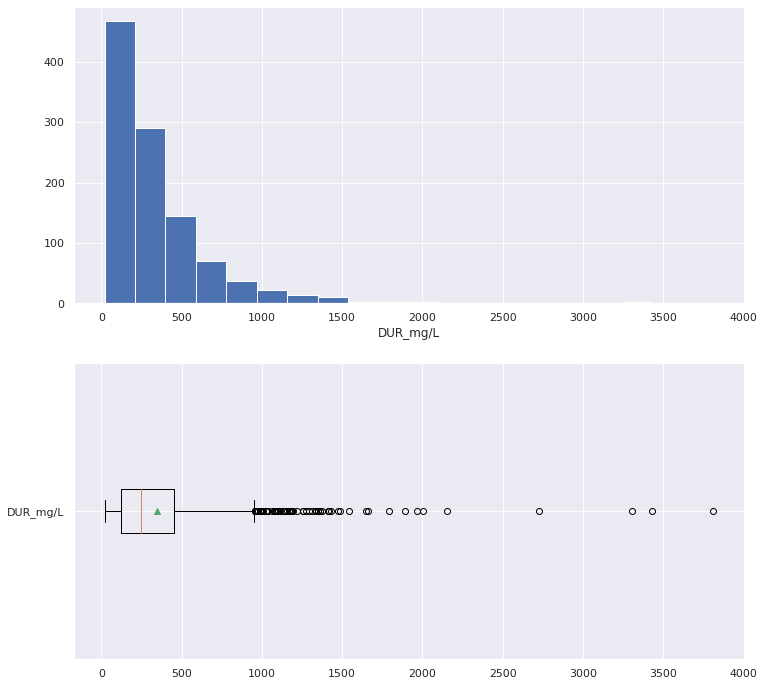

In [854]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [855]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

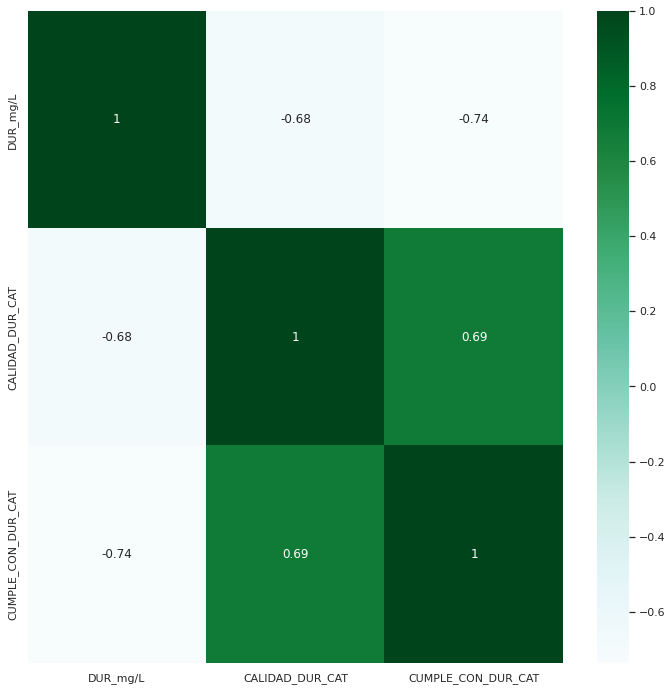

In [856]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Coliformes fecales*

In [857]:
columns = ['COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'CUMPLE_CON_CF']
columns_CAT = ['CALIDAD_COLI_FEC_CAT', 'CUMPLE_CON_CF_CAT']


In [858]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COLI_FEC_NMP/100_mL  1068 non-null   float64
 1   CALIDAD_COLI_FEC     1068 non-null   object 
 2   CUMPLE_CON_CF        1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [859]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [860]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [861]:
df.fillna(value = values, inplace = True)

In [862]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COLI_FEC_NMP/100_mL  1068 non-null   float64
 1   CALIDAD_COLI_FEC     1068 non-null   object 
 2   CUMPLE_CON_CF        1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [863]:
df[columns].head()

,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,CUMPLE_CON_CF
0,1.1,Potable - Excelente,SI
1,1.1,Potable - Excelente,SI
2,1.1,Potable - Excelente,SI
3,1.1,Potable - Excelente,SI
4,291.0,Aceptable,SI


In [864]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

In [865]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    1007
NO      61
Name: CUMPLE_CON_CF, dtype: int64

In [866]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count     1068.000000
mean       355.490356
std       2052.457014
min          1.100000
25%          1.100000
50%          1.100000
75%         13.250000
max      24196.000000
Name: COLI_FEC_NMP/100_mL, dtype: float64

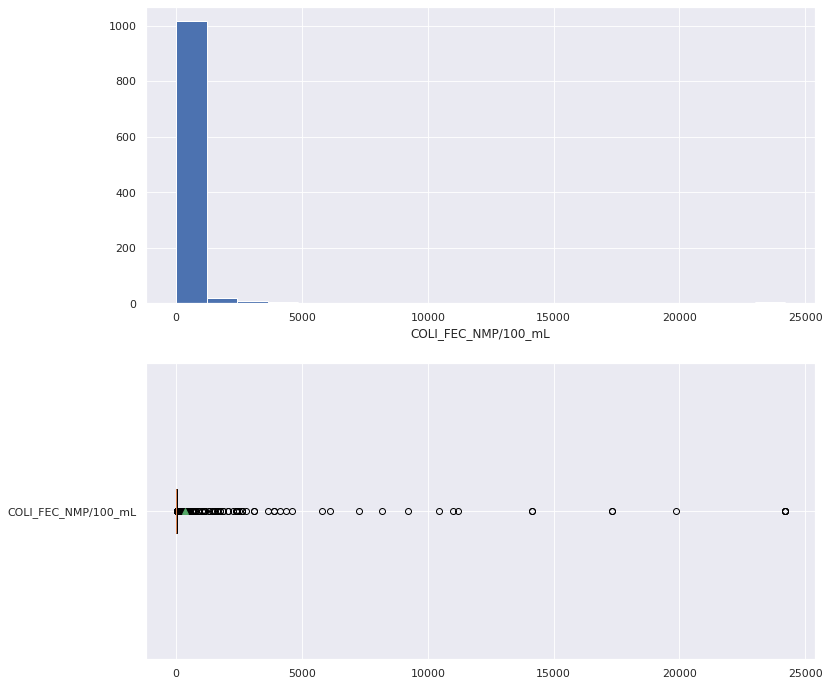

In [867]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [868]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

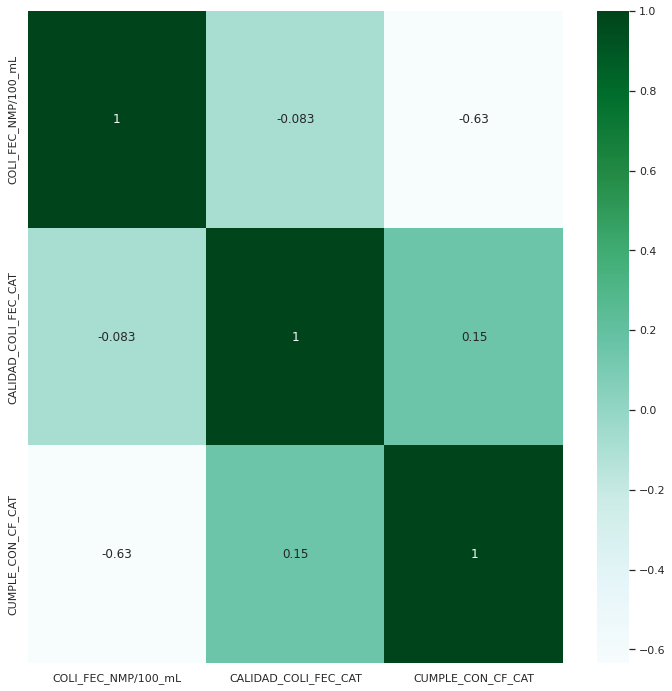

In [869]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Nitrógeno de nitratos*

In [870]:
columns = ['N_NO3_mg/L', 'CALIDAD_N_NO3', 'CUMPLE_CON_NO3']
columns_CAT = ['CALIDAD_N_NO3_CAT', 'CUMPLE_CON_NO3_CAT']


In [871]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N_NO3_mg/L      1068 non-null   float64
 1   CALIDAD_N_NO3   1068 non-null   object 
 2   CUMPLE_CON_NO3  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [872]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [873]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [874]:
df.fillna(value = values, inplace = True)

In [875]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N_NO3_mg/L      1068 non-null   float64
 1   CALIDAD_N_NO3   1068 non-null   object 
 2   CUMPLE_CON_NO3  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [876]:
df[columns].head()

,N_NO3_mg/L,CALIDAD_N_NO3,CUMPLE_CON_NO3
0,4.184656,Potable - Excelente,SI
1,5.750110,Potable - Buena calidad,SI
2,1.449803,Potable - Excelente,SI
3,1.258597,Potable - Excelente,SI
4,15.672251,No apta como FAAP,NO


In [877]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente        789
Potable - Buena calidad    197
No apta como FAAP           82
Name: CALIDAD_N_NO3, dtype: int64

In [878]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    985
NO     82
ND      1
Name: CUMPLE_CON_NO3, dtype: int64

In [879]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        4.317663
std         8.341504
min         0.020000
25%         0.650932
50%         2.080932
75%         5.200047
max       121.007813
Name: N_NO3_mg/L, dtype: float64

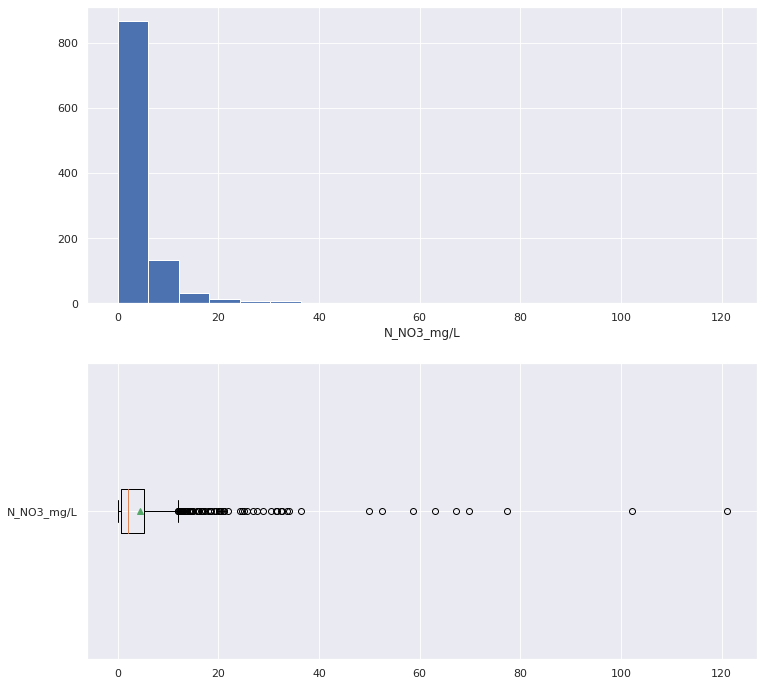

In [880]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [881]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

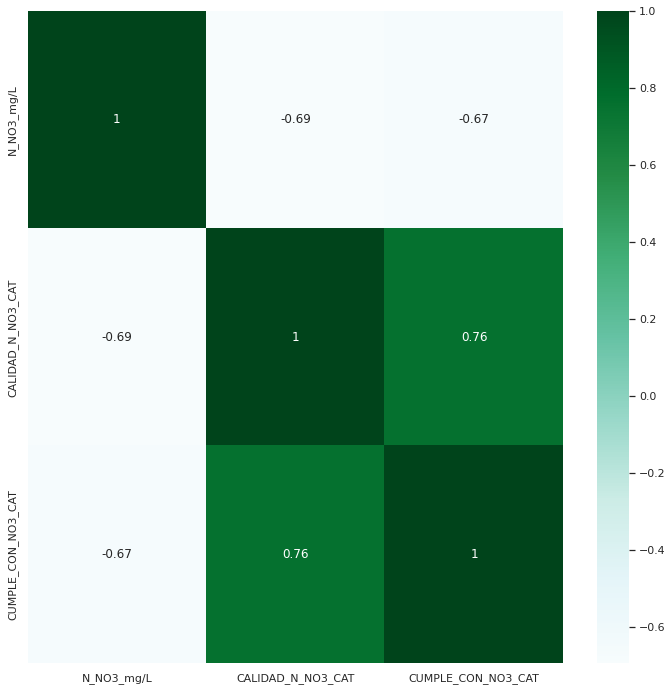

In [882]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Arsénico*

In [883]:
columns = ['AS_TOT_mg/L', 'CALIDAD_AS', 'CUMPLE_CON_AS']
columns_CAT = ['CALIDAD_AS_CAT', 'CUMPLE_CON_AS_CAT']


In [884]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AS_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_AS     1068 non-null   object 
 2   CUMPLE_CON_AS  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [885]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [886]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [887]:
df.fillna(value = values, inplace = True)

In [888]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AS_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_AS     1068 non-null   object 
 2   CUMPLE_CON_AS  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [889]:
df[columns].head()

,AS_TOT_mg/L,CALIDAD_AS,CUMPLE_CON_AS
0,0.0161,Apta como FAAP,SI
1,0.0134,Apta como FAAP,SI
2,0.0370,No apta como FAAP,NO
3,0.0154,Apta como FAAP,SI
4,0.0100,Potable - Excelente,SI


In [890]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente    816
No apta como FAAP      127
Apta como FAAP         125
Name: CALIDAD_AS, dtype: int64

In [891]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    941
NO    127
Name: CUMPLE_CON_AS, dtype: int64

In [892]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        0.019618
std         0.035209
min         0.010000
25%         0.010000
50%         0.010000
75%         0.010000
max         0.452200
Name: AS_TOT_mg/L, dtype: float64

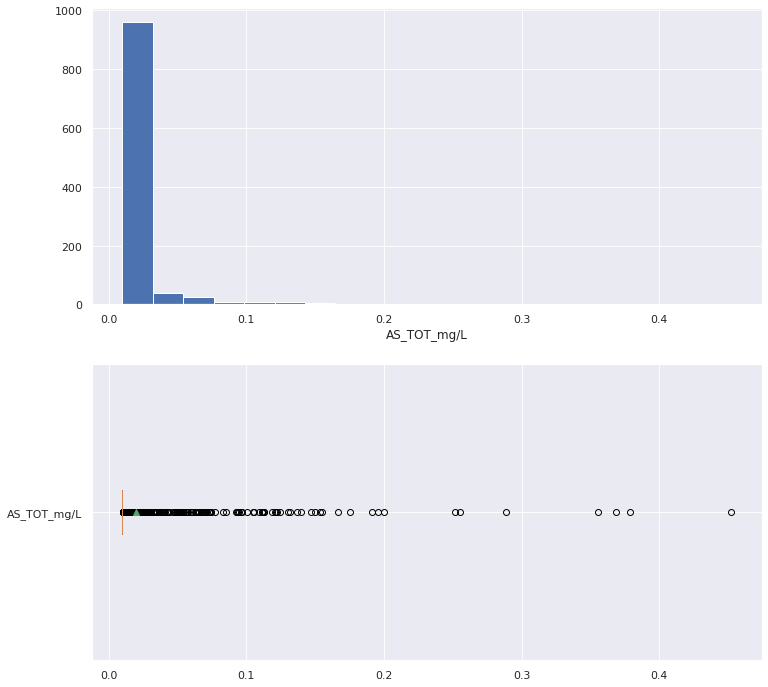

In [893]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [894]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

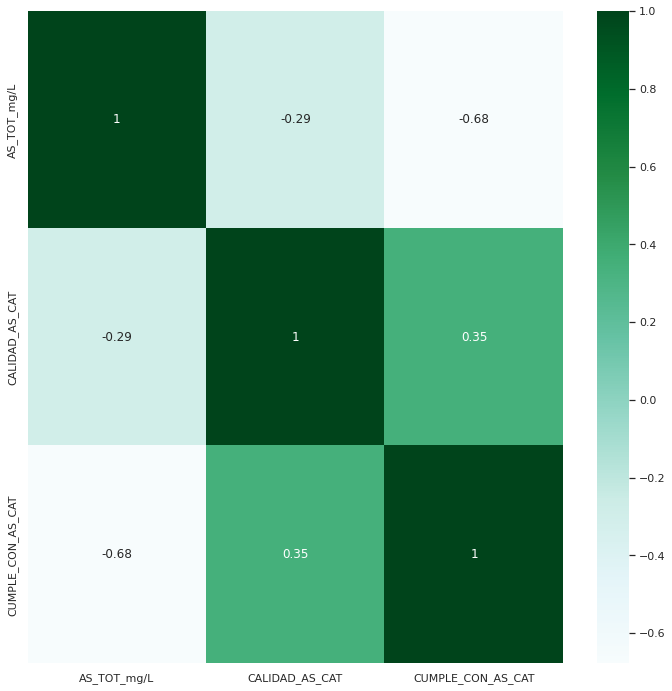

In [895]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Cadmio*

In [896]:
columns = ['CD_TOT_mg/L', 'CALIDAD_CD', 'CUMPLE_CON_CD']
columns_CAT = ['CALIDAD_CD_CAT', 'CUMPLE_CON_CD_CAT']


In [897]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CD_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_CD     1068 non-null   object 
 2   CUMPLE_CON_CD  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [898]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [899]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [900]:
df.fillna(value = values, inplace = True)

In [901]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CD_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_CD     1068 non-null   object 
 2   CUMPLE_CON_CD  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [902]:
df[columns].head()

,CD_TOT_mg/L,CALIDAD_CD,CUMPLE_CON_CD
0,0.003,Potable - Excelente,SI
1,0.003,Potable - Excelente,SI
2,0.003,Potable - Excelente,SI
3,0.003,Potable - Excelente,SI
4,0.003,Potable - Excelente,SI


In [903]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente    1066
No apta como FAAP         2
Name: CALIDAD_CD, dtype: int64

In [904]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    1066
NO       2
Name: CUMPLE_CON_CD, dtype: int64

In [905]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        0.003030
std         0.000894
min         0.003000
25%         0.003000
50%         0.003000
75%         0.003000
max         0.032110
Name: CD_TOT_mg/L, dtype: float64

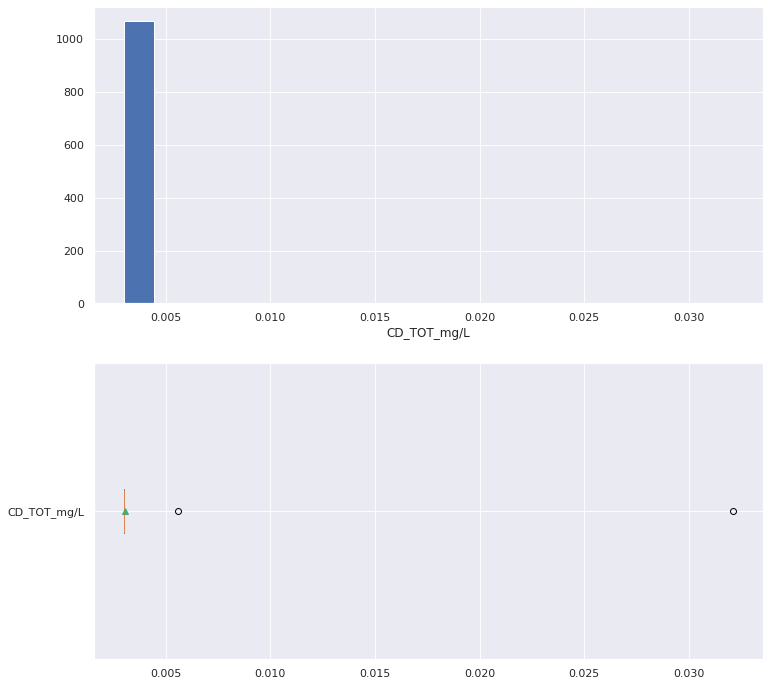

In [906]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [907]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

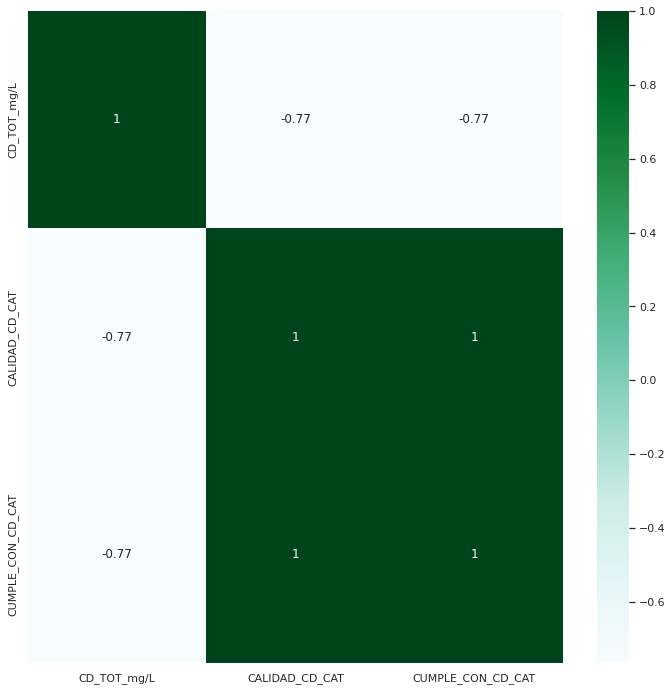

In [908]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Cromo*

In [909]:
			
columns = ['CR_TOT_mg/L', 'CALIDAD_CR', 'CUMPLE_CON_CR']
columns_CAT = ['CALIDAD_CR_CAT', 'CUMPLE_CON_CR_CAT']


In [910]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CR_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_CR     1068 non-null   object 
 2   CUMPLE_CON_CR  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [911]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [912]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [913]:
df.fillna(value = values, inplace = True)

In [914]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CR_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_CR     1068 non-null   object 
 2   CUMPLE_CON_CR  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [915]:
df[columns].head()

,CR_TOT_mg/L,CALIDAD_CR,CUMPLE_CON_CR
0,0.005,Potable - Excelente,SI
1,0.005,Potable - Excelente,SI
2,0.005,Potable - Excelente,SI
3,0.005,Potable - Excelente,SI
4,0.005,Potable - Excelente,SI


In [916]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente    1053
No apta como FAAP        15
Name: CALIDAD_CR, dtype: int64

In [917]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    1053
NO      15
Name: CUMPLE_CON_CR, dtype: int64

In [918]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        0.013276
std         0.154391
min         0.005000
25%         0.005000
50%         0.005000
75%         0.005000
max         5.003200
Name: CR_TOT_mg/L, dtype: float64

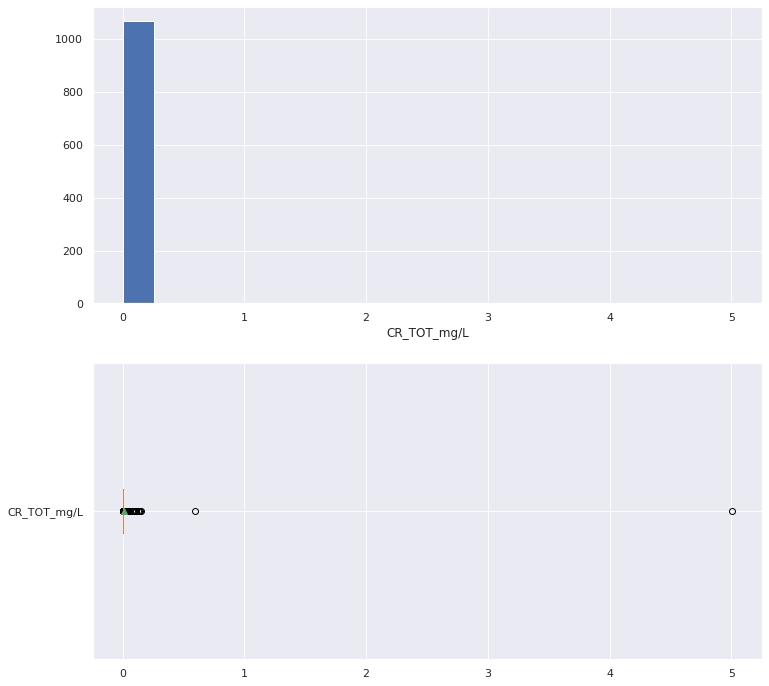

In [919]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [920]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

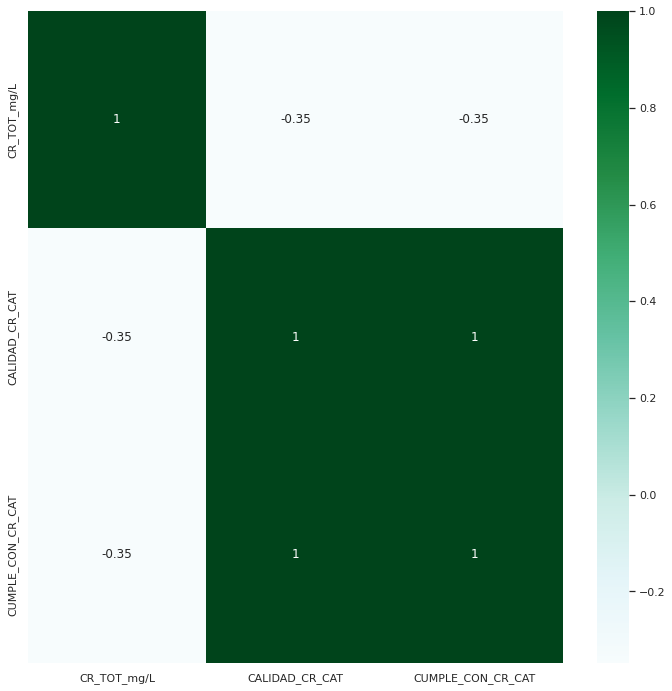

In [921]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Mercurio*

In [922]:

columns = ['HG_TOT_mg/L', 'CALIDAD_HG', 'CUMPLE_CON_HG']
columns_CAT = ['CALIDAD_HG_CAT', 'CUMPLE_CON_HG_CAT']


In [923]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HG_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_HG     1068 non-null   object 
 2   CUMPLE_CON_HG  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [924]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [925]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [926]:
df.fillna(value = values, inplace = True)

In [927]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HG_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_HG     1068 non-null   object 
 2   CUMPLE_CON_HG  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [928]:
df[columns].head()

,HG_TOT_mg/L,CALIDAD_HG,CUMPLE_CON_HG
0,0.0005,Potable - Excelente,SI
1,0.0005,Potable - Excelente,SI
2,0.0005,Potable - Excelente,SI
3,0.0005,Potable - Excelente,SI
4,0.0005,Potable - Excelente,SI


In [929]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente    1067
No apta como FAAP         1
Name: CALIDAD_HG, dtype: int64

In [930]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    1067
NO       1
Name: CUMPLE_CON_HG, dtype: int64

In [931]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        0.000557
std         0.000467
min         0.000500
25%         0.000500
50%         0.000500
75%         0.000500
max         0.014150
Name: HG_TOT_mg/L, dtype: float64

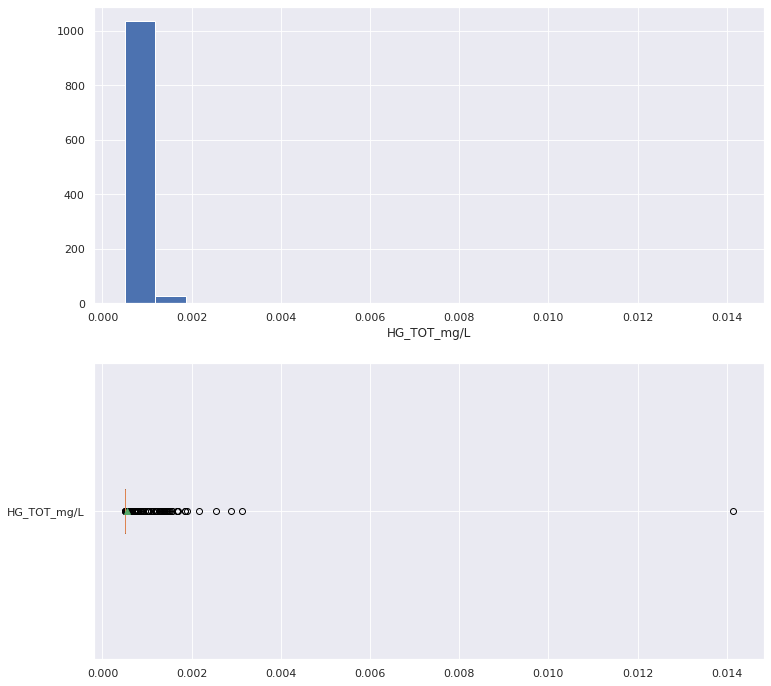

In [932]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [933]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

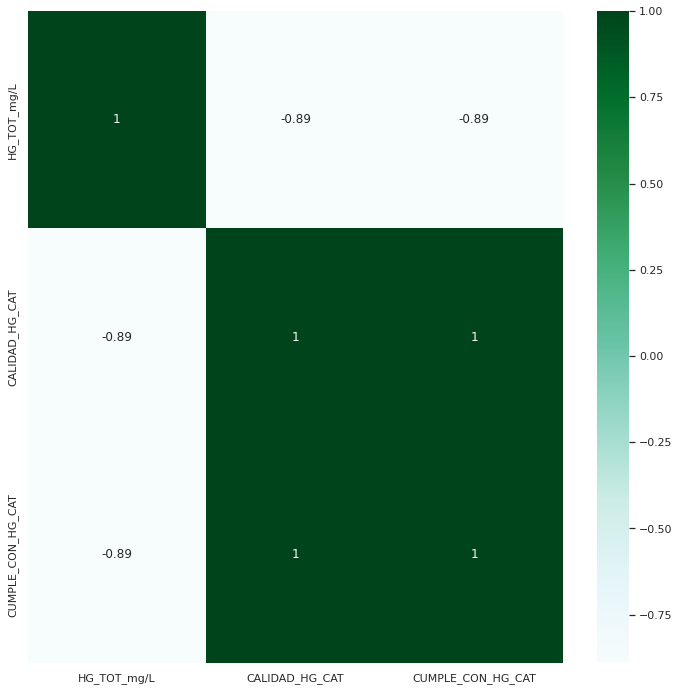

In [934]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Plomo*

In [935]:

columns = ['PB_TOT_mg/L', 'CALIDAD_PB', 'CUMPLE_CON_PB']
columns_CAT = ['CALIDAD_PB_CAT', 'CUMPLE_CON_PB_CAT']


In [936]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PB_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_PB     1068 non-null   object 
 2   CUMPLE_CON_PB  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [937]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [938]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [939]:
df.fillna(value = values, inplace = True)

In [940]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PB_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_PB     1068 non-null   object 
 2   CUMPLE_CON_PB  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [941]:
df[columns].head()

,PB_TOT_mg/L,CALIDAD_PB,CUMPLE_CON_PB
0,0.005,Potable - Excelente,SI
1,0.005,Potable - Excelente,SI
2,0.005,Potable - Excelente,SI
3,0.005,Potable - Excelente,SI
4,0.005,Potable - Excelente,SI


In [942]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente    1056
No apta como FAAP        12
Name: CALIDAD_PB, dtype: int64

In [943]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    1056
NO      12
Name: CUMPLE_CON_PB, dtype: int64

In [944]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        0.005282
std         0.003254
min         0.005000
25%         0.005000
50%         0.005000
75%         0.005000
max         0.080900
Name: PB_TOT_mg/L, dtype: float64

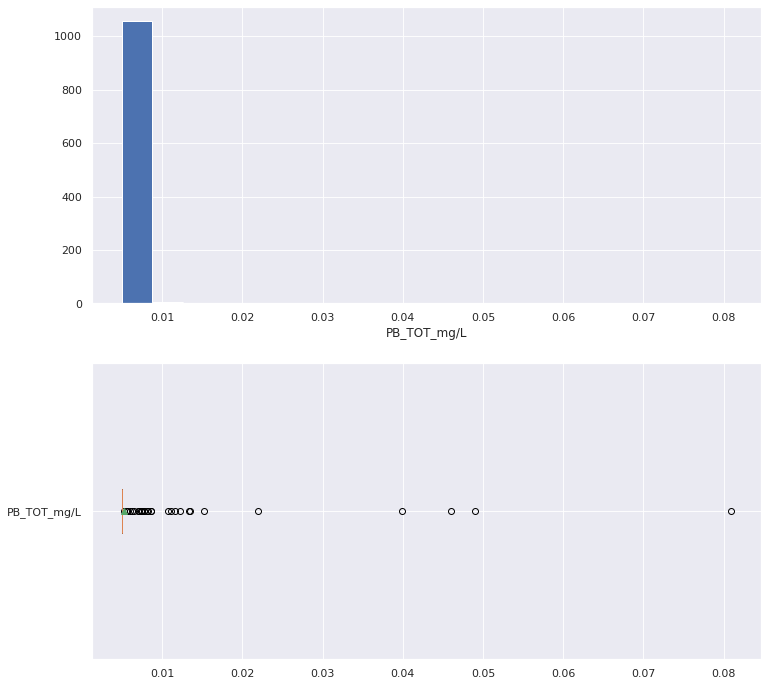

In [945]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [946]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

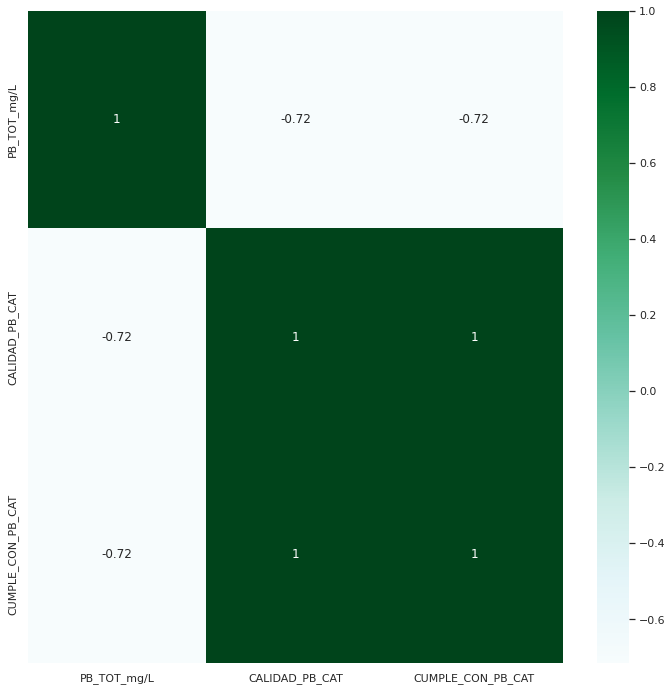

In [947]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Manganeso*

In [948]:
columns = ['MN_TOT_mg/L', 'CALIDAD_MN', 'CUMPLE_CON_MN']
columns_CAT = ['CALIDAD_MN_CAT', 'CUMPLE_CON_MN_CAT']


In [949]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MN_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_MN     1068 non-null   object 
 2   CUMPLE_CON_MN  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [950]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [951]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [952]:
df.fillna(value = values, inplace = True)

In [953]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MN_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_MN     1068 non-null   object 
 2   CUMPLE_CON_MN  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [954]:
df[columns].head()

,MN_TOT_mg/L,CALIDAD_MN,CUMPLE_CON_MN
0,0.0015,Potable - Excelente,SI
1,0.0015,Potable - Excelente,SI
2,0.0015,Potable - Excelente,SI
3,0.0015,Potable - Excelente,SI
4,0.0015,Potable - Excelente,SI


In [955]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente                                  982
Puede afectar la salud                                50
Sin efectos en la salud - Puede dar color al agua     36
Name: CALIDAD_MN, dtype: int64

In [956]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    982
NO     86
Name: CUMPLE_CON_MN, dtype: int64

In [957]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        0.072478
std         0.376512
min         0.001500
25%         0.001500
50%         0.001500
75%         0.009947
max         8.982000
Name: MN_TOT_mg/L, dtype: float64

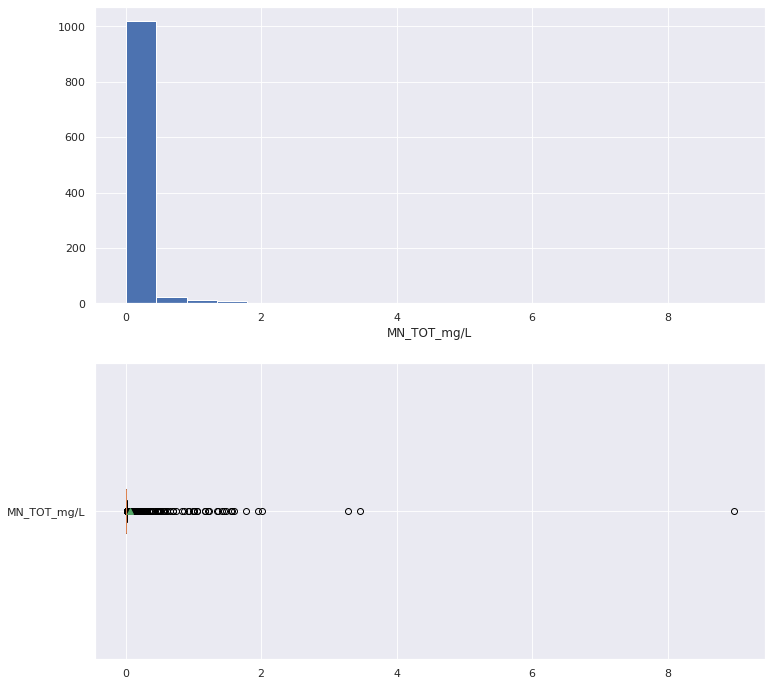

In [958]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [959]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

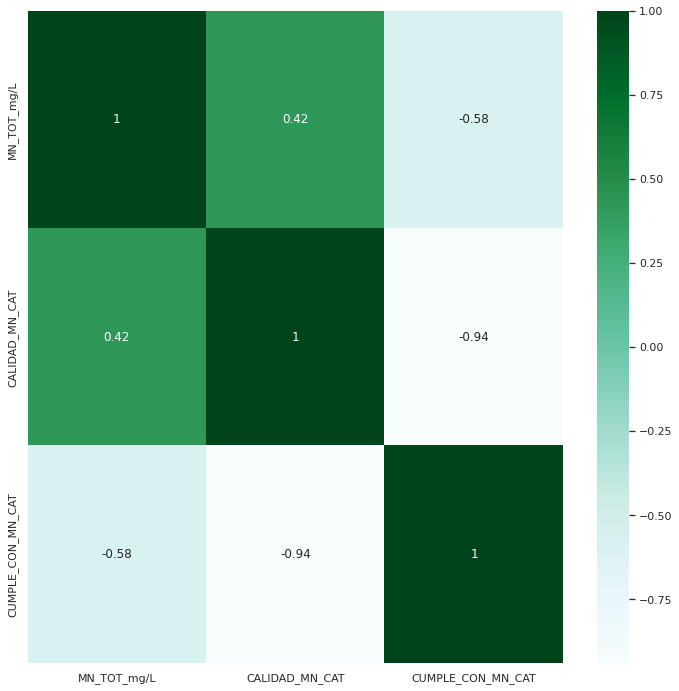

In [960]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

####*Hierro*

In [961]:
columns = ['FE_TOT_mg/L', 'CALIDAD_FE', 'CUMPLE_CON_FE']
columns_CAT = ['CALIDAD_FE_CAT', 'CUMPLE_CON_FE_CAT']


In [962]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FE_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_FE     1068 non-null   object 
 2   CUMPLE_CON_FE  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Se observan valores nulos para esta trieja de datos, procedemos a imputar con mediana y moda.

In [963]:
#tenemos un valor con símbolo <, procedemos a removerlo
df[columns[0]].replace('<', '', inplace = True, regex=True)

df[columns[0]] = df[columns[0]].astype('float64')

In [964]:
values =  {
      columns[0] : df[columns[0]].median(), 
      columns[1] : df[columns[1]].mode()[0], 
      columns[2] : df[columns[2]].mode()[0]
}

In [965]:
df.fillna(value = values, inplace = True)

In [966]:
#validamos nulos de nuevo
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FE_TOT_mg/L    1068 non-null   float64
 1   CALIDAD_FE     1068 non-null   object 
 2   CUMPLE_CON_FE  1068 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [967]:
df[columns].head()

,FE_TOT_mg/L,CALIDAD_FE,CUMPLE_CON_FE
0,0.0891,Potable - Excelente,SI
1,0.0250,Potable - Excelente,SI
2,0.0250,Potable - Excelente,SI
3,0.0250,Potable - Excelente,SI
4,0.0250,Potable - Excelente,SI


In [968]:
#Observamos el conteo para el campo de calidad.
df[columns[1]].value_counts()

Potable - Excelente                                  932
Sin efectos en la salud - Puede dar color al agua    136
Name: CALIDAD_FE, dtype: int64

In [969]:
#Conteo de resultado aprobatorio vs no aprobatorio para este estudio
df[columns[2]].value_counts()

SI    932
NO    136
Name: CUMPLE_CON_FE, dtype: int64

In [970]:
#Analisis de distribución para único valor numérico de la trieja
df[columns[0]].describe()

count    1068.000000
mean        0.410387
std         5.537974
min         0.025000
25%         0.025000
50%         0.046960
75%         0.173380
max       178.615000
Name: FE_TOT_mg/L, dtype: float64

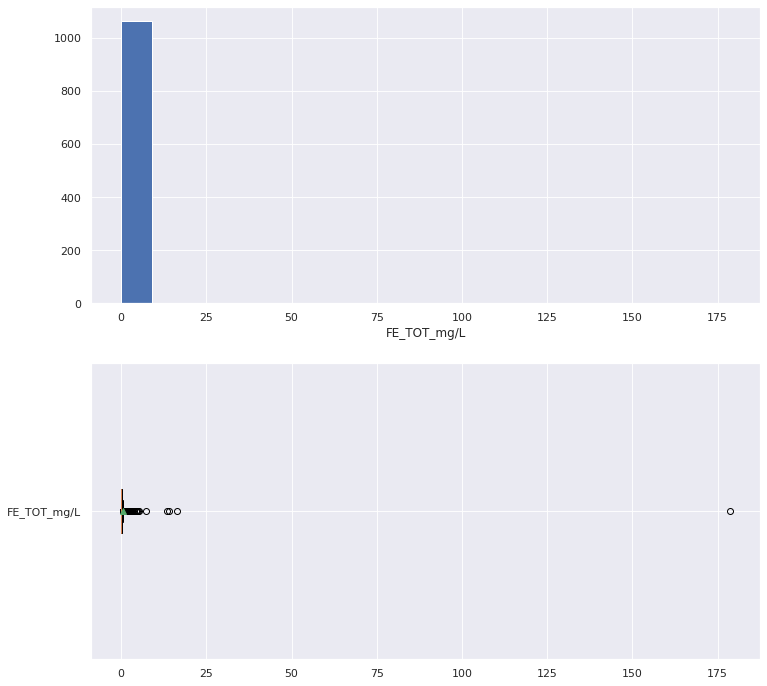

In [971]:
sns.set(rc={'figure.figsize':(12,12)})
plt.subplots(2, 1)    # Definimos nicho
plt.subplot(2, 1, 1)
plt.hist(df[columns[0]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
plt.xlabel(columns[0])

plt.subplot(2, 1, 2)
#plt.xlim(0, 2000)
plt.boxplot(
      df[columns[0]], 
      vert = False, 
      showmeans = True, 
      labels = columns[0 : 1],
      showfliers = True
)

plt.show()

En ambas gráficas podemos observar como la media tiene tendencia positiva. Observamos también algunos outliers muy pronunciados

Sabemos perfectamente que esta trieja de columnas está relacionada, de hecho conocemos perfectamente el rango de valores que determinan tanto la descrpción así como si el test pasa o no. Pero de todos modos procedemos a ver como están relacionados

In [972]:
#Para poder ver la relación, convertimos los categoricos a numericos con label encode
df[columns_CAT[0]] = df[columns[1]].astype('category').cat.codes
df[columns_CAT[1]] = df[columns[2]].astype('category').cat.codes

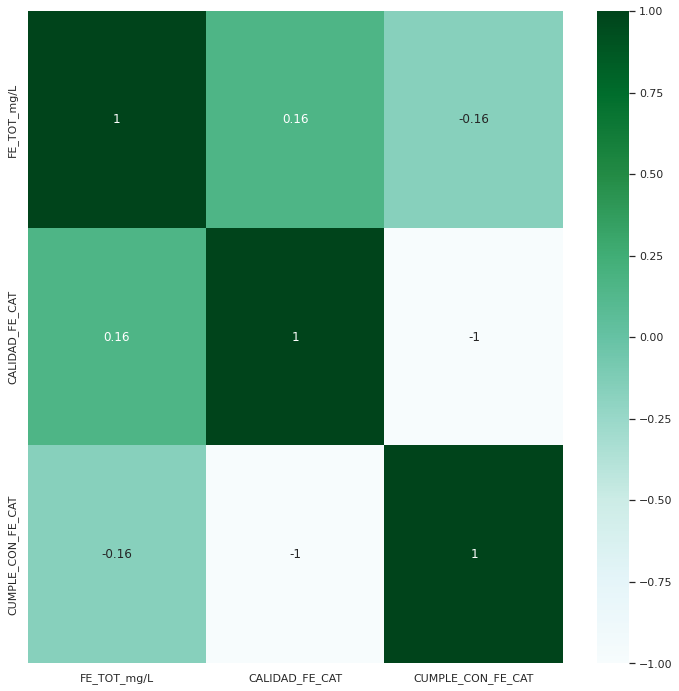

In [973]:
sns.set(rc={'figure.figsize':(9,6)}) 
plt.subplots(figsize=(12, 12))
sns.heatmap(df[[columns[0], columns_CAT[0], columns_CAT[1]]].corr(), annot = True, cmap = 'BuGn')
plt.show()

#K-means

In [472]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 3.7 MB/s 
     |████████████████████████████████| 1.0 MB 38.2 MB/s 
     |████████████████████████████████| 1.7 MB 41.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 31.8 MB/s 
     |████████████████████████████████| 6.3 MB 46.1 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=e38df888ca3a6db3f4d77addddbd3c092e394ed20e6691733e74bc762f06231e
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=045ed244153ad5506a491dea13417780825136decaffa7fd9adc4ce72ff261f8
  Stored in directory: /root/.

In [629]:
from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans

import qeds
qeds.themes.mpl_style();
from mpl_toolkits.mplot3d import Axes3D

##Análisis inicial

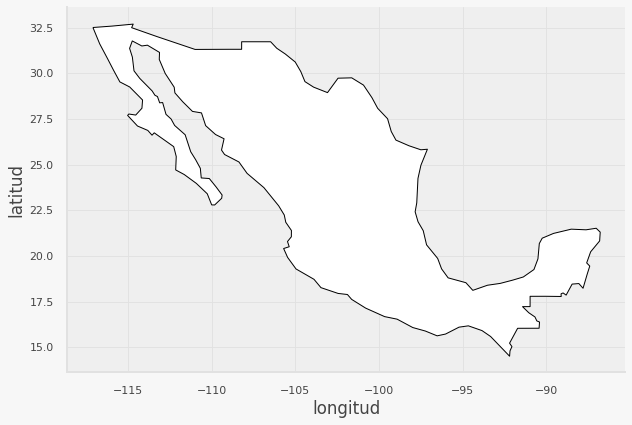

In [630]:
#Mapa de México, limpio

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10, 10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black', color='white')
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

In [631]:
#Para este ejercicio usaremos un subset del DF original
ndf = df[["LATITUD","LONGITUD", "SEMAFORO"]]

In [632]:
#Definimos una varibale que englobe latitud y longitud
latlong = ndf[["LATITUD","LONGITUD"]]

In [633]:
latlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LATITUD   1068 non-null   float64
 1   LONGITUD  1068 non-null   float64
dtypes: float64(2)
memory usage: 16.8 KB


In [634]:
latlong.describe()

,LATITUD,LONGITUD
count,1068.000000,1068.000000
mean,23.163618,-101.891007
std,3.887670,6.703263
min,14.561150,-116.664250
25%,20.212055,-105.388865
50%,22.617190,-102.174180
75%,25.510285,-98.974716
max,32.677713,-86.864120


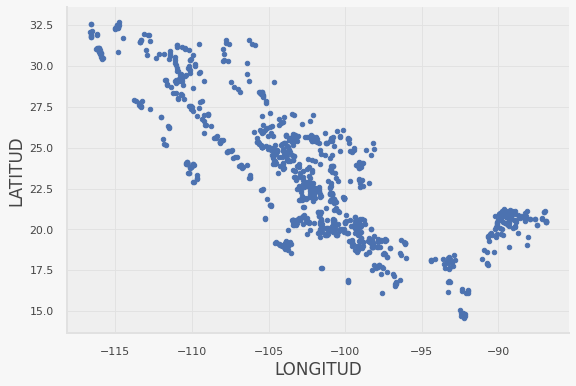

In [635]:
#Incluso podemos dar un vistazo inicial grafico
latlong.plot.scatter( "LONGITUD","LATITUD")

In [636]:
#Ahora añadiremos un objecto point a nuestro dataset
ndf["Coordinates"] = list(zip(ndf.LONGITUD, ndf.LATITUD))
ndf["Coordinates"] = ndf["Coordinates"].apply(Point)
ndf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LATITUD,LONGITUD,SEMAFORO,Coordinates
0,22.20887,-102.02210,Verde,POINT (-102.0221 22.20887)
1,21.99958,-102.20075,Verde,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,Rojo,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,Verde,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,Rojo,POINT (-110.2448 23.45138)


In [637]:
#Ya que tenemos el POINT en el dataframe, podemos crear un objeto GeoDataFrame que nos servirá para graficar en nuestro mapa
gdf = gpd.GeoDataFrame(ndf, geometry = "Coordinates")
gdf.head()

,LATITUD,LONGITUD,SEMAFORO,Coordinates
0,22.20887,-102.02210,Verde,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,Verde,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,Rojo,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,Verde,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,Rojo,POINT (-110.24480 23.45138)


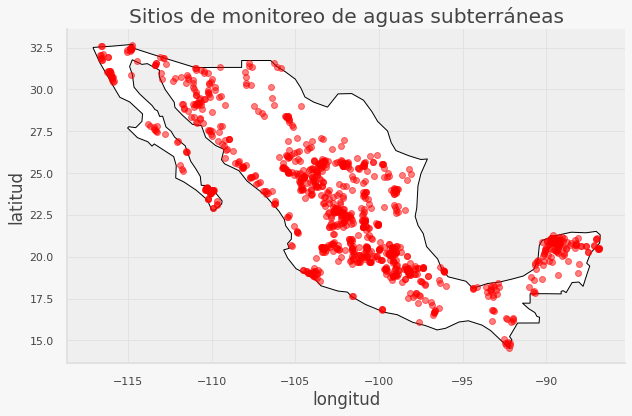

In [638]:
#Finalmente, podemos graficar nuestros puntos sobre nuestro mapa
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax = gax, color = 'red', alpha = 0.5)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Sitios de monitoreo de aguas subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

##*K-means unicamente con coordenadas*

In [1000]:
#Creamos una copia del DF unicamente para k_means_coordenadas
kmeans_coord_df = df[["LATITUD","LONGITUD", "SEMAFORO"]]

In [1001]:
#También necesitamos cambiar el semáforo de string a variable categórica usando label encoder
kmeans_coord_df['SEMAFORO_CAT'] = kmeans_coord_df.SEMAFORO.astype('category').cat.codes
kmeans_coord_df[['SEMAFORO_CAT', 'SEMAFORO']].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SEMAFORO_CAT  SEMAFORO
2             Verde       434
1             Rojo        387
0             Amarillo    247
dtype: int64

In [1002]:
kmeans_coord_df.head()

,LATITUD,LONGITUD,SEMAFORO,SEMAFORO_CAT
0,22.20887,-102.02210,Verde,2
1,21.99958,-102.20075,Verde,2
2,22.36685,-102.28801,Rojo,1
3,22.18435,-102.29449,Verde,2
4,23.45138,-110.24480,Rojo,1


In [1003]:
#Definimos nuestras variables de entrada y salida
X = np.array(kmeans_coord_df[["LATITUD", "LONGITUD"]])
y = np.array(kmeans_coord_df[["SEMAFORO_CAT"]])
X.shape

(1068, 2)

In [1004]:
#Primero que nada, añadimos colores originales al semáforo. Esto nos ayudará a graficar con los 3 colores del semáforo
colores=['yellow','red','green']
asignar=[]

for row in y:
    asignar.append(colores[row[0]])

kmeans_coord_df['COLOR_SEMAFORO_REAL'] = asignar

kmeans_coord_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LATITUD,LONGITUD,SEMAFORO,SEMAFORO_CAT,COLOR_SEMAFORO_REAL
0,22.20887,-102.02210,Verde,2,green
1,21.99958,-102.20075,Verde,2,green
2,22.36685,-102.28801,Rojo,1,red
3,22.18435,-102.29449,Verde,2,green
4,23.45138,-110.24480,Rojo,1,red
...,...,...,...,...,...
1063,24.76036,-99.54191,Rojo,1,red
1064,24.78280,-99.70099,Rojo,1,red
1065,25.55197,-99.82249,Rojo,1,red
1066,24.80118,-100.32683,Verde,2,green


In [1005]:
#Ahora añadiremos un objecto point a nuestro dataset
kmeans_coord_df["Coordinates"] = list(zip(kmeans_coord_df.LONGITUD, kmeans_coord_df.LATITUD))
kmeans_coord_df["Coordinates"] = kmeans_coord_df["Coordinates"].apply(Point)
kmeans_coord_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LATITUD,LONGITUD,SEMAFORO,SEMAFORO_CAT,COLOR_SEMAFORO_REAL,Coordinates
0,22.20887,-102.02210,Verde,2,green,POINT (-102.0221 22.20887)
1,21.99958,-102.20075,Verde,2,green,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,Rojo,1,red,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,Verde,2,green,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,Rojo,1,red,POINT (-110.2448 23.45138)


In [1006]:
#Ya que tenemos el POINT en el dataframe, podemos crear un objeto GeoDataFrame que nos servirá para graficar en nuestro mapa
g_kmeans_coord_df = gpd.GeoDataFrame(kmeans_coord_df, geometry = "Coordinates")
g_kmeans_coord_df.head()

,LATITUD,LONGITUD,SEMAFORO,SEMAFORO_CAT,COLOR_SEMAFORO_REAL,Coordinates
0,22.20887,-102.02210,Verde,2,green,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,Verde,2,green,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,Rojo,1,red,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,Verde,2,green,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,Rojo,1,red,POINT (-110.24480 23.45138)


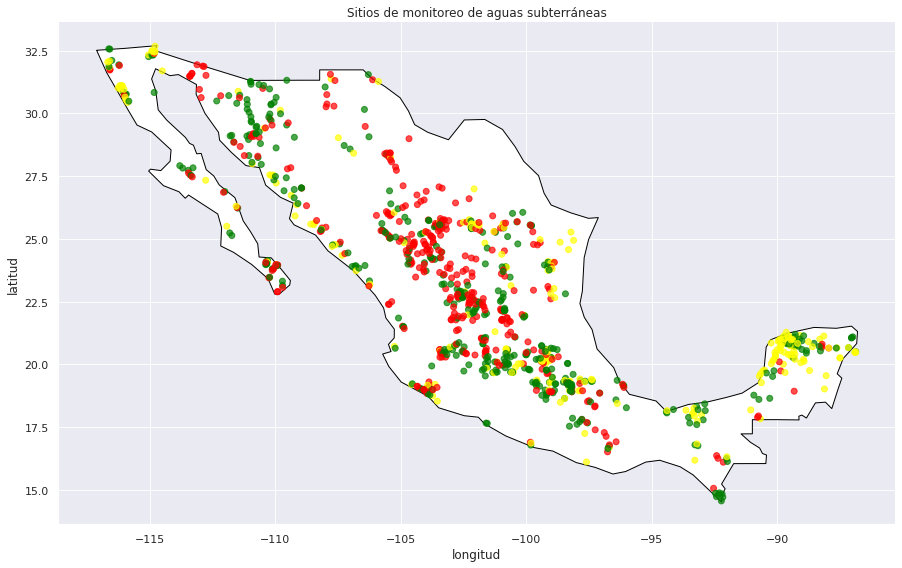

In [1007]:
#Finalmente, podemos graficar nuestros puntos sobre nuestro mapa
fig, gax = plt.subplots(figsize=(15,12))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
g_kmeans_coord_df.plot(ax = gax, color = g_kmeans_coord_df.COLOR_SEMAFORO_REAL, alpha = 0.7)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Sitios de monitoreo de aguas subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Ahora si procedemos al kmeans

Dado a que nosotros solo tenemos 3 clusters (amarillo, verde, rojo), no necesitamos encontrat el codo

In [1008]:
kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  19.47336214  -90.7284703 ]
 [  28.43820216 -110.79448776]
 [  22.25422556 -101.7221275 ]]


In [1009]:
#Vamos a volver a graficar ahora las predicciones, para ver como agrupó la calidad del agua de acuerdo unicamente a las coordenadas
labels = kmeans.predict(X)
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [1010]:
#Asignamos los colores nuevos predichos
colores = ['yellow','red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])

g_kmeans_coord_df['COLOR_SEMAFORO_HAT'] = asignar
g_kmeans_coord_df



,LATITUD,LONGITUD,SEMAFORO,SEMAFORO_CAT,COLOR_SEMAFORO_REAL,Coordinates,COLOR_SEMAFORO_HAT
0,22.20887,-102.02210,Verde,2,green,POINT (-102.02210 22.20887),green
1,21.99958,-102.20075,Verde,2,green,POINT (-102.20075 21.99958),green
2,22.36685,-102.28801,Rojo,1,red,POINT (-102.28801 22.36685),green
3,22.18435,-102.29449,Verde,2,green,POINT (-102.29449 22.18435),green
4,23.45138,-110.24480,Rojo,1,red,POINT (-110.24480 23.45138),red
...,...,...,...,...,...,...,...
1063,24.76036,-99.54191,Rojo,1,red,POINT (-99.54191 24.76036),green
1064,24.78280,-99.70099,Rojo,1,red,POINT (-99.70099 24.78280),green
1065,25.55197,-99.82249,Rojo,1,red,POINT (-99.82249 25.55197),green
1066,24.80118,-100.32683,Verde,2,green,POINT (-100.32683 24.80118),green


In [1011]:
#Obtenemos los centros
cdf = pd.DataFrame(kmeans.cluster_centers_, columns = ["Latitud", "Longitud"])
cdf["Coordinates"] = list(zip(cdf.Longitud, cdf.Latitud))
cdf["Coordinates"] = cdf["Coordinates"].apply(Point)
cdf['Colores'] = ['yellow','red','green']
g_cdf = gpd.GeoDataFrame(cdf, geometry = "Coordinates")
g_cdf.head()

,Latitud,Longitud,Coordinates,Colores
0,19.473362,-90.728470,POINT (-90.72847 19.47336),yellow
1,28.438202,-110.794488,POINT (-110.79449 28.43820),red
2,22.254226,-101.722127,POINT (-101.72213 22.25423),green


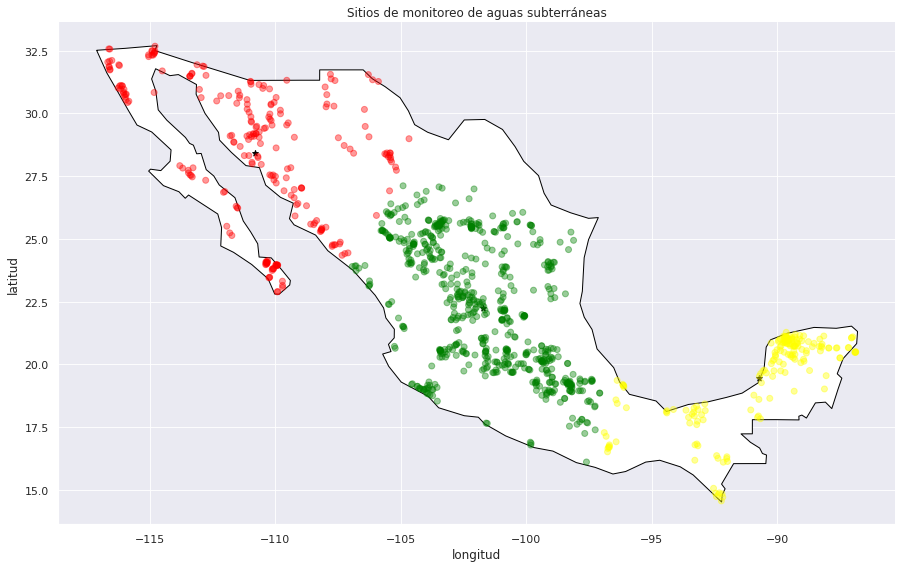

In [1012]:
#Procedemos a graficar
fig, gax = plt.subplots(figsize=(15,12))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

g_cdf.plot(ax = gax, color = 'black', marker = '*', alpha = 1)

g_kmeans_coord_df.plot(ax = gax, color = g_kmeans_coord_df.COLOR_SEMAFORO_HAT, alpha = 0.4)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Sitios de monitoreo de aguas subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Se puede observar finalmente que las coordenadas por si mismas no nos dicen absolutamente nada sobre como se pueden clasificar las aguas. Como era de esperarse, el algoritmo simplemente agrupo las coordenadas por cercanía. 

##*K-means con todos los argumentos*

Finalmente haremos un análisis k-means usando todas las variables de entrada disponibles que tenemos para ver si esta vez el agrupamiento es más exacto

In [1013]:
#Creamos una copia del DF ahora con todas las variables
kmeans_all_df = df[["LATITUD","LONGITUD", "CUMPLE_CON_ALC", "CUMPLE_CON_COND", "CUMPLE_CON_SDT_ra", "CUMPLE_CON_SDT_salin", "CUMPLE_CON_FLUO",
"CUMPLE_CON_DUR", "CUMPLE_CON_CF", "CUMPLE_CON_NO3", "CUMPLE_CON_AS", "CUMPLE_CON_CD", "CUMPLE_CON_CR",
"CUMPLE_CON_HG", "CUMPLE_CON_PB", "CUMPLE_CON_MN", "CUMPLE_CON_FE", "SEMAFORO"]]


#Eliminamos todos aquellos registros que no tengan valor asignado
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_ALC != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_COND != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_SDT_ra != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_SDT_salin != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_FLUO != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_DUR != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_CF != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_NO3 != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_AS != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_CD != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_CR != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_HG != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_PB != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_MN != 'ND']
kmeans_all_df = kmeans_all_df[kmeans_all_df.CUMPLE_CON_FE != 'ND']


In [1015]:
#El siguiente paso es hacer label encode para tener numeros numéricos discretos
kmeans_all_df['CUMPLE_CON_ALC_CAT'] = kmeans_all_df.CUMPLE_CON_ALC.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_COND_CAT'] = kmeans_all_df.CUMPLE_CON_COND.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_SDT_ra_CAT'] = kmeans_all_df.CUMPLE_CON_SDT_ra.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_SDT_salin_CAT'] = kmeans_all_df.CUMPLE_CON_SDT_salin.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_FLUO_CAT'] = kmeans_all_df.CUMPLE_CON_FLUO.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_DUR_CAT'] = kmeans_all_df.CUMPLE_CON_DUR.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_CF_CAT'] = kmeans_all_df.CUMPLE_CON_CF.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_NO3_CAT'] = kmeans_all_df.CUMPLE_CON_NO3.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_AS_CAT'] = kmeans_all_df.CUMPLE_CON_AS.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_CD_CAT'] = kmeans_all_df.CUMPLE_CON_CD.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_CR_CAT'] = kmeans_all_df.CUMPLE_CON_CR.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_HG_CAT'] = kmeans_all_df.CUMPLE_CON_HG.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_PB_CAT'] = kmeans_all_df.CUMPLE_CON_PB.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_MN_CAT'] = kmeans_all_df.CUMPLE_CON_MN.astype('category').cat.codes
kmeans_all_df['CUMPLE_CON_FE_CAT'] = kmeans_all_df.CUMPLE_CON_FE.astype('category').cat.codes
kmeans_all_df['SEMAFORO_CAT'] = kmeans_all_df.SEMAFORO.astype('category').cat.codes

In [1016]:
kmeans_all_df.head()

,LATITUD,LONGITUD,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,...,CUMPLE_CON_CF_CAT,CUMPLE_CON_NO3_CAT,CUMPLE_CON_AS_CAT,CUMPLE_CON_CD_CAT,CUMPLE_CON_CR_CAT,CUMPLE_CON_HG_CAT,CUMPLE_CON_PB_CAT,CUMPLE_CON_MN_CAT,CUMPLE_CON_FE_CAT,SEMAFORO_CAT
0,22.20887,-102.02210,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,1,1,2
1,21.99958,-102.20075,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,1,1,2
2,22.36685,-102.28801,SI,SI,SI,SI,NO,SI,SI,SI,...,1,1,0,1,1,1,1,1,1,1
3,22.18435,-102.29449,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,1,1,2
4,23.45138,-110.24480,SI,SI,SI,SI,SI,SI,SI,NO,...,1,0,1,1,1,1,1,1,1,1


In [1018]:
#Definimos nuestras variables de entrada y salida
X = np.array(kmeans_all_df[["LATITUD", "LONGITUD", 
                            "CUMPLE_CON_ALC_CAT", 
                            "CUMPLE_CON_COND_CAT", 
                            "CUMPLE_CON_SDT_ra_CAT", 
                            "CUMPLE_CON_SDT_salin_CAT", 
                            "CUMPLE_CON_FLUO_CAT", 
                            "CUMPLE_CON_DUR_CAT", 
                            "CUMPLE_CON_CF_CAT", 
                            "CUMPLE_CON_NO3_CAT", 
                            "CUMPLE_CON_AS_CAT", 
                            "CUMPLE_CON_CD_CAT", 
                            "CUMPLE_CON_CR_CAT", 
                            "CUMPLE_CON_HG_CAT", 
                            "CUMPLE_CON_PB_CAT", 
                            "CUMPLE_CON_MN_CAT", 
                            "CUMPLE_CON_FE_CAT", 
    ]])

y = np.array(kmeans_all_df[["SEMAFORO_CAT"]])
X.shape

(1054, 17)

In [1019]:
#Primero que nada, añadimos colores originales al semáforo. Esto nos ayudará a graficar con los 3 colores del semáforo
colores=['yellow','red','green']
asignar=[]

for row in y:
    asignar.append(colores[row[0]])

kmeans_all_df['COLOR_SEMAFORO_REAL'] = asignar

kmeans_all_df

,LATITUD,LONGITUD,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,...,CUMPLE_CON_NO3_CAT,CUMPLE_CON_AS_CAT,CUMPLE_CON_CD_CAT,CUMPLE_CON_CR_CAT,CUMPLE_CON_HG_CAT,CUMPLE_CON_PB_CAT,CUMPLE_CON_MN_CAT,CUMPLE_CON_FE_CAT,SEMAFORO_CAT,COLOR_SEMAFORO_REAL
0,22.20887,-102.02210,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,1,2,green
1,21.99958,-102.20075,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,1,2,green
2,22.36685,-102.28801,SI,SI,SI,SI,NO,SI,SI,SI,...,1,0,1,1,1,1,1,1,1,red
3,22.18435,-102.29449,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,1,2,green
4,23.45138,-110.24480,SI,SI,SI,SI,SI,SI,SI,NO,...,0,1,1,1,1,1,1,1,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,24.76036,-99.54191,SI,NO,SI,SI,SI,NO,SI,NO,...,0,1,1,1,1,1,1,1,1,red
1064,24.78280,-99.70099,SI,SI,SI,SI,SI,SI,SI,NO,...,0,1,1,1,1,1,1,1,1,red
1065,25.55197,-99.82249,SI,NO,SI,SI,SI,NO,SI,NO,...,0,1,1,1,1,1,1,1,1,red
1066,24.80118,-100.32683,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,1,2,green


In [1020]:
#Ahora añadiremos un objecto point a nuestro dataset
kmeans_all_df["Coordinates"] = list(zip(kmeans_all_df.LONGITUD, kmeans_all_df.LATITUD))
kmeans_all_df["Coordinates"] = kmeans_all_df["Coordinates"].apply(Point)
kmeans_all_df.head()

,LATITUD,LONGITUD,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,...,CUMPLE_CON_AS_CAT,CUMPLE_CON_CD_CAT,CUMPLE_CON_CR_CAT,CUMPLE_CON_HG_CAT,CUMPLE_CON_PB_CAT,CUMPLE_CON_MN_CAT,CUMPLE_CON_FE_CAT,SEMAFORO_CAT,COLOR_SEMAFORO_REAL,Coordinates
0,22.20887,-102.02210,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,2,green,POINT (-102.0221 22.20887)
1,21.99958,-102.20075,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,2,green,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,SI,SI,SI,SI,NO,SI,SI,SI,...,0,1,1,1,1,1,1,1,red,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,2,green,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,SI,SI,SI,SI,SI,SI,SI,NO,...,1,1,1,1,1,1,1,1,red,POINT (-110.2448 23.45138)


In [1021]:
#Ya que tenemos el POINT en el dataframe, podemos crear un objeto GeoDataFrame que nos servirá para graficar en nuestro mapa
g_kmeans_all_df = gpd.GeoDataFrame(kmeans_all_df, geometry = "Coordinates")
g_kmeans_all_df.head()

,LATITUD,LONGITUD,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,...,CUMPLE_CON_AS_CAT,CUMPLE_CON_CD_CAT,CUMPLE_CON_CR_CAT,CUMPLE_CON_HG_CAT,CUMPLE_CON_PB_CAT,CUMPLE_CON_MN_CAT,CUMPLE_CON_FE_CAT,SEMAFORO_CAT,COLOR_SEMAFORO_REAL,Coordinates
0,22.20887,-102.02210,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,2,green,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,2,green,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,SI,SI,SI,SI,NO,SI,SI,SI,...,0,1,1,1,1,1,1,1,red,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,1,2,green,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,SI,SI,SI,SI,SI,SI,SI,NO,...,1,1,1,1,1,1,1,1,red,POINT (-110.24480 23.45138)


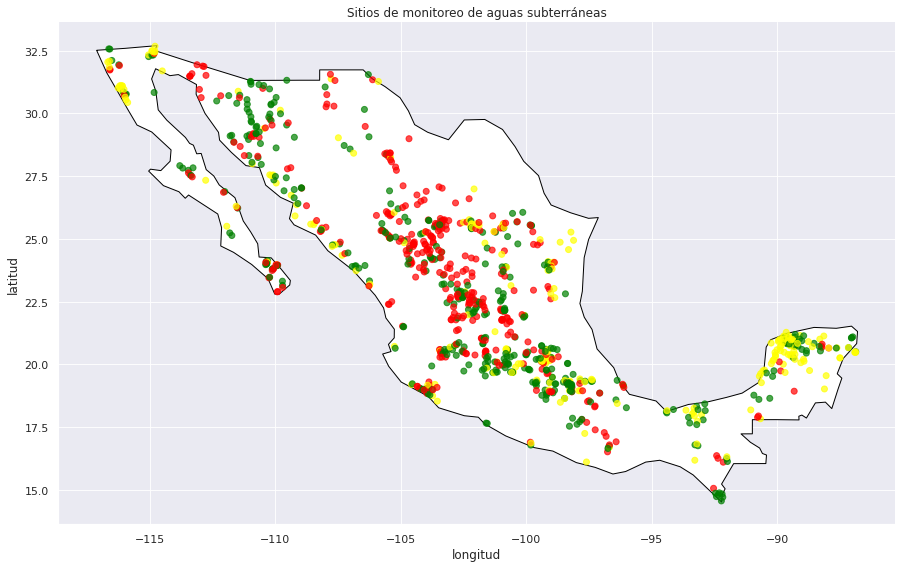

In [1022]:
#Finalmente, podemos graficar nuestros puntos sobre nuestro mapa
fig, gax = plt.subplots(figsize=(15,12))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
g_kmeans_all_df.plot(ax = gax, color = g_kmeans_all_df.COLOR_SEMAFORO_REAL, alpha = 0.7)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Sitios de monitoreo de aguas subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Dado a que nosotros solo tenemos 3 clusters (amarillo, verde, rojo), no necesitamos encontrar el codo

In [1023]:
kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  22.27162356 -101.71558109    0.93135725    0.90639626    0.94383775
     0.94383775    0.77067083    0.83307332    0.94695788    0.90795632
     0.84555382    0.99843994    0.99219969    0.99843994    0.98439938
     0.92199688    0.87675507]
 [  28.42037512 -110.74089614    0.97435897    0.87179487    0.88888889
     0.88888889    0.85042735    0.79059829    0.8974359     0.91025641
     0.8974359     1.            0.9957265     1.            0.99145299
     0.88888889    0.86752137]
 [  19.47516461  -90.69843377    0.96089385    0.81564246    0.95530726
     0.95530726    0.95530726    0.61452514    0.98324022    1.
     0.98882682    0.99441341    0.94972067    1.            1.
     0.94972067    0.86592179]]


In [1024]:
#Vamos a volver a graficar ahora las predicciones, para ver como agrupó la calidad del agua de acuerdo unicamente a las coordenadas
labels = kmeans.predict(X)
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [1025]:
#Asignamos los colores nuevos predichos
colores = ['yellow','red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])

g_kmeans_all_df['COLOR_SEMAFORO_HAT'] = asignar
g_kmeans_all_df



,LATITUD,LONGITUD,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,...,CUMPLE_CON_CD_CAT,CUMPLE_CON_CR_CAT,CUMPLE_CON_HG_CAT,CUMPLE_CON_PB_CAT,CUMPLE_CON_MN_CAT,CUMPLE_CON_FE_CAT,SEMAFORO_CAT,COLOR_SEMAFORO_REAL,Coordinates,COLOR_SEMAFORO_HAT
0,22.20887,-102.02210,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,2,green,POINT (-102.02210 22.20887),yellow
1,21.99958,-102.20075,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,2,green,POINT (-102.20075 21.99958),yellow
2,22.36685,-102.28801,SI,SI,SI,SI,NO,SI,SI,SI,...,1,1,1,1,1,1,1,red,POINT (-102.28801 22.36685),yellow
3,22.18435,-102.29449,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,2,green,POINT (-102.29449 22.18435),yellow
4,23.45138,-110.24480,SI,SI,SI,SI,SI,SI,SI,NO,...,1,1,1,1,1,1,1,red,POINT (-110.24480 23.45138),red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,24.76036,-99.54191,SI,NO,SI,SI,SI,NO,SI,NO,...,1,1,1,1,1,1,1,red,POINT (-99.54191 24.76036),yellow
1064,24.78280,-99.70099,SI,SI,SI,SI,SI,SI,SI,NO,...,1,1,1,1,1,1,1,red,POINT (-99.70099 24.78280),yellow
1065,25.55197,-99.82249,SI,NO,SI,SI,SI,NO,SI,NO,...,1,1,1,1,1,1,1,red,POINT (-99.82249 25.55197),yellow
1066,24.80118,-100.32683,SI,SI,SI,SI,SI,SI,SI,SI,...,1,1,1,1,1,1,2,green,POINT (-100.32683 24.80118),yellow


In [1028]:
#Obtenemos los centros
kmeans.cluster_centers_
cdf = pd.DataFrame(kmeans.cluster_centers_, columns = ["Latitud", "Longitud", "CUMPLE_CON_ALC_CAT", 
                            "CUMPLE_CON_COND_CAT", 
                            "CUMPLE_CON_SDT_ra_CAT", 
                            "CUMPLE_CON_SDT_salin_CAT", 
                            "CUMPLE_CON_FLUO_CAT", 
                            "CUMPLE_CON_DUR_CAT", 
                            "CUMPLE_CON_CF_CAT", 
                            "CUMPLE_CON_NO3_CAT", 
                            "CUMPLE_CON_AS_CAT", 
                            "CUMPLE_CON_CD_CAT", 
                            "CUMPLE_CON_CR_CAT", 
                            "CUMPLE_CON_HG_CAT", 
                            "CUMPLE_CON_PB_CAT", 
                            "CUMPLE_CON_MN_CAT", 
                            "CUMPLE_CON_FE_CAT"])
cdf["Coordinates"] = list(zip(cdf.Longitud, cdf.Latitud))
cdf["Coordinates"] = cdf["Coordinates"].apply(Point)
cdf['Colores'] = ['yellow','red','green']
g_cdf = gpd.GeoDataFrame(cdf, geometry = "Coordinates")
g_cdf.head()

,Latitud,Longitud,CUMPLE_CON_ALC_CAT,CUMPLE_CON_COND_CAT,CUMPLE_CON_SDT_ra_CAT,CUMPLE_CON_SDT_salin_CAT,CUMPLE_CON_FLUO_CAT,CUMPLE_CON_DUR_CAT,CUMPLE_CON_CF_CAT,CUMPLE_CON_NO3_CAT,CUMPLE_CON_AS_CAT,CUMPLE_CON_CD_CAT,CUMPLE_CON_CR_CAT,CUMPLE_CON_HG_CAT,CUMPLE_CON_PB_CAT,CUMPLE_CON_MN_CAT,CUMPLE_CON_FE_CAT,Coordinates,Colores
0,22.271624,-101.715581,0.931357,0.906396,0.943838,0.943838,0.770671,0.833073,0.946958,0.907956,0.845554,0.998440,0.992200,0.99844,0.984399,0.921997,0.876755,POINT (-101.71558 22.27162),yellow
1,28.420375,-110.740896,0.974359,0.871795,0.888889,0.888889,0.850427,0.790598,0.897436,0.910256,0.897436,1.000000,0.995726,1.00000,0.991453,0.888889,0.867521,POINT (-110.74090 28.42038),red
2,19.475165,-90.698434,0.960894,0.815642,0.955307,0.955307,0.955307,0.614525,0.983240,1.000000,0.988827,0.994413,0.949721,1.00000,1.000000,0.949721,0.865922,POINT (-90.69843 19.47516),green


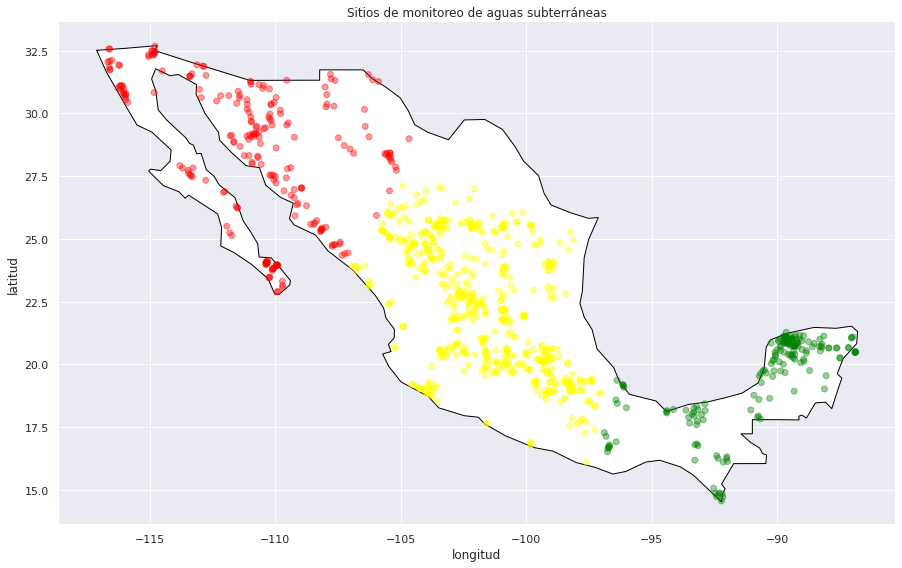

In [1030]:
#Procedemos a graficar
fig, gax = plt.subplots(figsize=(15,12))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

#g_cdf.plot(ax = gax, color = 'black', marker = '*', alpha = 1)

g_kmeans_all_df.plot(ax = gax, color = g_kmeans_all_df.COLOR_SEMAFORO_HAT, alpha = 0.4)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Sitios de monitoreo de aguas subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Después de aplicar K-means usando todos los parámetros, no encontramos gran diferencia, pues al parecer las coordenadas siguen siendo determinantes a la hora de asignar una clase para este caso en particular
